# EDA for Olist Datset
## Imports

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
# Import all datasets from the Olist dataset
orders = pd.read_csv('olist_dataset/olist_orders_dataset.csv')
customers = pd.read_csv('olist_dataset/olist_customers_dataset.csv')
order_items = pd.read_csv('olist_dataset/olist_order_items_dataset.csv')
products = pd.read_csv('olist_dataset/olist_products_dataset.csv')
sellers = pd.read_csv('olist_dataset/olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_dataset/olist_geolocation_dataset.csv')
order_reviews = pd.read_csv('olist_dataset/olist_order_reviews_dataset.csv')
order_payments = pd.read_csv('olist_dataset/olist_order_payments_dataset.csv')
geoloc = pd.read_csv('olist_dataset/olist_geolocation_dataset.csv')


## Initial steps

### Data Validation

In [3]:
# Define lists with expexted columns
customer_cols = ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
geoloc_cols = ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
order_items_cols = ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
order_payments_cols = ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
order_reviews_cols = ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
orders_cols = ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
products_cols = ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
sellers_cols = ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

In [4]:
# Check if all columns are present in the datasets
def check_columns(df, expected_cols, name=None):
    missing_cols = [col for col in expected_cols if col not in df.columns]
    if missing_cols:
        print(f"Missing columns in {name}: {missing_cols}")
    else:
        print(f"All expected columns are present in {name}.")

In [5]:
# Validate missing columns would be flagged
# Create a test DataFrame with missing columns
test_df = pd.DataFrame(columns=['test_col1', 'test_col2'])
expected_cols = ['test_col1', 'test_col2', 'missing_col']
check_columns(test_df, expected_cols, name='test_validation')

# Now proceed with actual data validation
check_columns(customers, customer_cols, name='customers')
check_columns(geolocation, geoloc_cols, name='geolocation')

Missing columns in test_validation: ['missing_col']
All expected columns are present in customers.
All expected columns are present in geolocation.


In [6]:
# Check if all columns are present in the datasets
check_columns(customers, customer_cols, name='customers')
check_columns(geolocation, geoloc_cols, name='geolocation')
check_columns(order_items, order_items_cols, name='order_items')
check_columns(order_payments, order_payments_cols, name='order_payments')
check_columns(order_reviews, order_reviews_cols, name='order_reviews')
check_columns(orders, orders_cols, name='orders')
check_columns(products, products_cols, name='products')
check_columns(sellers, sellers_cols, name='sellers')

All expected columns are present in customers.
All expected columns are present in geolocation.
All expected columns are present in order_items.
All expected columns are present in order_payments.
All expected columns are present in order_reviews.
All expected columns are present in orders.
All expected columns are present in products.
All expected columns are present in sellers.


### Initial Exploration

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [11]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [12]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [13]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [14]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
# Change the product name to english
prod_cat_name_tr = pd.read_csv("olist_dataset/product_category_name_translation.csv")
products = products.merge(prod_cat_name_tr, on='product_category_name', how='left')
products.drop ('product_category_name', axis=1, inplace=True)

In [17]:
products.head()

product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2  96bd76ec8810374ed1b65e291975717f                 46.0   
3  cef67bcfe19066a932b7673e239eb23d                 27.0   
4  9dc1a7de274444849c219cff195d0b71                 37.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       276.0                 1.0            1000.0   
2                       250.0                 1.0             154.0   
3                       261.0                 1.0             371.0   
4                       402.0                 4.0             625.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               30.0               18.0              20.0   
2               18.0                9.0              15.0   
3               26.0                4.0              26.0   
4               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

In [18]:
# Join order related datasets
df = orders.merge(order_items, on='order_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(sellers, on='seller_id', how='left')
df = df.merge(customers, on='customer_id', how='left')
df = df.merge(order_payments, on='order_id', how='left')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   order_item_id                  117604 non-null  float64
 9   product_id                     117604 non-null  object 
 10  seller_id                      117604 non-null  object 
 11  shipping_limit_date            117604 non-null  object 
 12  price                         

In [20]:
# remove columns with irrelevant information
df = df.drop(axis=1,
columns=['product_name_lenght',
'product_description_lenght',
'product_photos_qty',
'product_weight_g',
'product_length_cm',
'product_height_cm',
'product_width_cm',
'order_delivered_carrier_date',
'order_delivered_customer_date',
'order_estimated_delivery_date'
,'shipping_limit_date','order_approved_at'])

In [21]:
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp  order_item_id  \
0    delivered      2017-10-02 10:56:33            1.0   
1    delivered      2017-10-02 10:56:33            1.0   
2    delivered      2017-10-02 10:56:33            1.0   
3    delivered      2018-07-24 20:41:37            1.0   
4    delivered      2018-08-08 08:38:49            1.0   

                         product_id                         seller_id   price  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   29.99   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   29.99   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   29.99   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962  118.70   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2  159.90   

   freight_value product_category_name_english  ...     seller_city  \
0           8.72                    housewares  ...            maua   
1           8.72                    housewares  ...            maua   
2           8.72                    housewares  ...            maua   
3          22.76                     perfumery  ...  belo horizonte   
4          19.22                          auto  ...         guariba   

  seller_state                customer_unique_id customer_zip_code_prefix  \
0           SP  7c396fd4830fd04220f754e42b4e5bff                     3149   
1           SP  7c396fd4830fd04220f754e42b4e5bff                     3149   
2           SP  7c396fd4830fd04220f754e42b4e5bff                     3149   
3           SP  af07308b275d755c9edb36a90c618231                    47813   
4           SP  3a653a41f6f9fc3d2a113cf8398680e8                    75265   

   customer_city customer_state payment_sequential  payment_type  \
0      sao paulo             SP                1.0   credit_card   
1      sao paulo             SP                3.0       voucher   
2      sao paulo             SP                2.0       voucher   
3      barreiras             BA                1.0        boleto   
4     vianopolis             GO                1.0   credit_card   

  payment_installments  payment_value  
0                  1.0          18.12  
1                  1.0           2.00  
2                  1.0          18.59  
3                  1.0         141.46  
4                  3.0         179.12  

[5 rows x 21 columns]

Columns with missing values:
product_category_name_english    2553
product_id                        830
seller_id                         830
price                             830
order_item_id                     830
freight_value                     830
seller_zip_code_prefix            830
seller_city                       830
seller_state                      830
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
dtype: int64


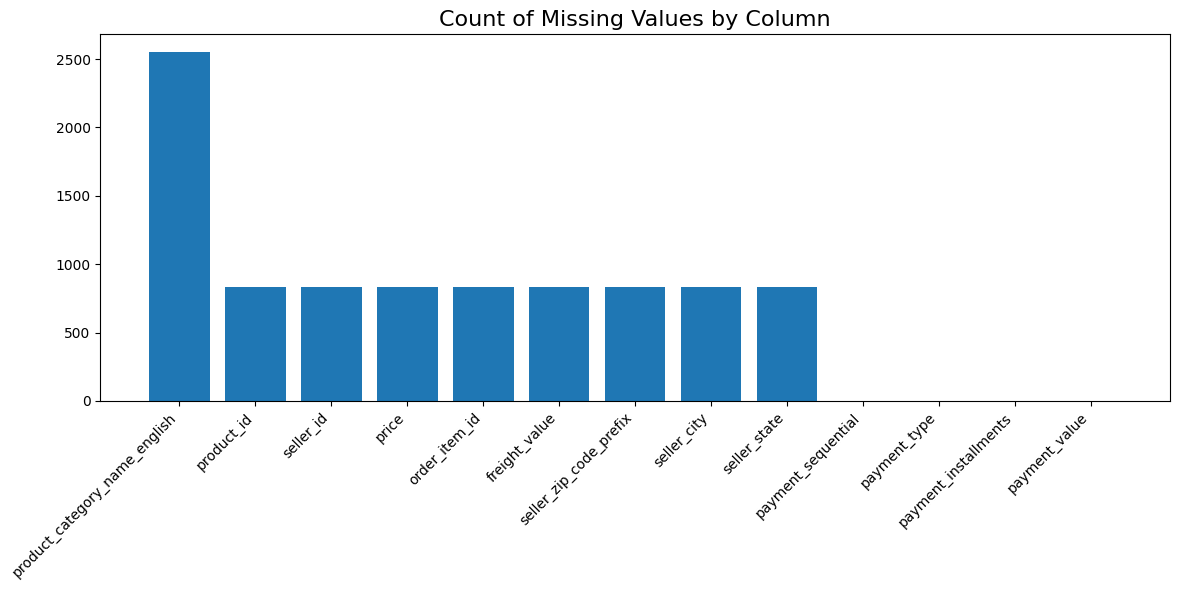

Missing values after handling:
order_id         0
customer_id      0
price            0
freight_value    0
dtype: int64


In [22]:
# Count missing values in each column of the merged dataframe
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values:")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(12, 6))
plt.bar(missing_values.index, missing_values.values)
plt.title('Count of Missing Values by Column', size=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Strategy for handling missing values
def handle_missing_values(df):
    # Make a copy to avoid modifying the original dataframe
    df_clean = df.copy()
    
    # Handle missing categorical variables
    for col in ['product_category_name_english', 'customer_city', 'seller_city']:
        if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
            # Replace with the most common value
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    
    # Handle missing numerical variables
    for col in ['price', 'freight_value', 'payment_value']:
        if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
            # Replace with median (less sensitive to outliers than mean)
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    # Handle missing dates with the median date
    date_cols = ['order_purchase_date', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date']
    for col in date_cols:
        if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    # Drop rows where order_id or customer_id is missing as these are critical
    if 'order_id' in df_clean.columns and df_clean['order_id'].isnull().sum() > 0:
        df_clean = df_clean.dropna(subset=['order_id'])
    
    if 'customer_id' in df_clean.columns and df_clean['customer_id'].isnull().sum() > 0:
        df_clean = df_clean.dropna(subset=['customer_id'])
        
    return df_clean

# Apply missing value handling
df_clean = handle_missing_values(df)

# Verify no critical missing values remain
print("Missing values after handling:")
print(df_clean[['order_id', 'customer_id', 'price', 'freight_value']].isnull().sum())

### Convert datetime strings to datetime

In [23]:
months_in_order = ['Jan',
                   'Feb',
                   'Mar',
                   'Apr',
                   'May',
                   'Jun',
                   'Jul',
                   'Aug',
                   'Sep',
                   'Oct',
                   'Nov',
                   'Dec']

In [24]:
df['order_purchase_date']=pd.to_datetime(df['order_purchase_timestamp'])
df['year'] = df['order_purchase_date'].dt.year
df['month'] = df['order_purchase_date'].dt.strftime('%b')
df['month'] = pd.Categorical(
    df['month'],
    categories=months_in_order,
    ordered=True
)
df['day'] = df['order_purchase_date'].dt.day
df['hour'] = df['order_purchase_date'].dt.hour

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  object        
 4   order_item_id                  117604 non-null  float64       
 5   product_id                     117604 non-null  object        
 6   seller_id                      117604 non-null  object        
 7   price                          117604 non-null  float64       
 8   freight_value                  117604 non-null  float64       
 9   product_category_name_english  115881 non-null  object        
 10  seller_zip_code_prefix         117604 non-null  float64       
 11  

In [26]:
df[df['seller_id'].isna()]['order_status'].value_counts()

order_status
unavailable    643
canceled       179
created          5
invoiced         2
shipped          1
Name: count, dtype: int64

In [27]:
df[(df['seller_id'].isna()) & (df['order_status'] == 'unavailable')]

order_id                       customer_id  \
319     8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
700     c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
821     37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
880     d57e15fb07fd180f06ab3926b39edcd2  470b93b3f1cde85550fc74cd3a476c78   
1384    2f634e2cebf8c0283e7ef0989f77d217  7353b0fb8e8d9675e3a704c60ca44ebe   
...                                  ...                               ...   
118183  1c7c8ab324927f5b6e52338bd110bef4  95b1767df51d6fa09402267d8de314df   
118184  1c7c8ab324927f5b6e52338bd110bef4  95b1767df51d6fa09402267d8de314df   
118205  aaab15da689073f8f9aa978a390a69d1  df20748206e4b865b2f14a5eabbfcf34   
118331  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
118403  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

       order_status order_purchase_timestamp  order_item_id product_id  \
319     unavailable      2017-11-16 15:09:28            NaN        NaN   
700     unavailable      2018-01-31 11:31:37            NaN        NaN   
821     unavailable      2017-08-14 17:38:02            NaN        NaN   
880     unavailable      2018-01-08 19:39:03            NaN        NaN   
1384    unavailable      2017-09-27 20:55:33            NaN        NaN   
...             ...                      ...            ...        ...   
118183  unavailable      2017-12-23 18:48:09            NaN        NaN   
118184  unavailable      2017-12-23 18:48:09            NaN        NaN   
118205  unavailable      2018-01-16 14:27:59            NaN        NaN   
118331  unavailable      2017-08-23 16:28:04            NaN        NaN   
118403  unavailable      2017-10-10 10:50:03            NaN        NaN   

       seller_id  price  freight_value product_category_name_english  ...  \
319          NaN    NaN            NaN                           NaN  ...   
700          NaN    NaN            NaN                           NaN  ...   
821          NaN    NaN            NaN                           NaN  ...   
880          NaN    NaN            NaN                           NaN  ...   
1384         NaN    NaN            NaN                           NaN  ...   
...          ...    ...            ...                           ...  ...   
118183       NaN    NaN            NaN                           NaN  ...   
118184       NaN    NaN            NaN                           NaN  ...   
118205       NaN    NaN            NaN                           NaN  ...   
118331       NaN    NaN            NaN                           NaN  ...   
118403       NaN    NaN            NaN                           NaN  ...   

        customer_state payment_sequential payment_type payment_installments  \
319                 SC                1.0  credit_card                  5.0   
700                 SP                1.0  credit_card                  1.0   
821                 SP                1.0       boleto                  1.0   
880                 BA                1.0       boleto                  1.0   
1384                SP                1.0  credit_card                 12.0   
...                ...                ...          ...                  ...   
118183              SP                2.0      voucher                  1.0   
118184              SP                1.0  credit_card                  3.0   
118205              SP                1.0       boleto                  1.0   
118331              RJ                1.0  credit_card                  2.0   
118403              SP                1.0       boleto                  1.0   

        payment_value order_purchase_date  year  month day  hour  
319             84.00 2017-11-16 15:09:28  2017    Nov  16    15  
700             97.68 2018-01-31 11:31:37  2018    Jan  31    11  
821            132.46 2017-08-14 17:38:02  2017    Aug  14    17  
880            134.38 2018-01-08 19:39:03  2018    Jan   8    19

We will consider dropping these rows as they seem to be filled with NaN and unknown values.

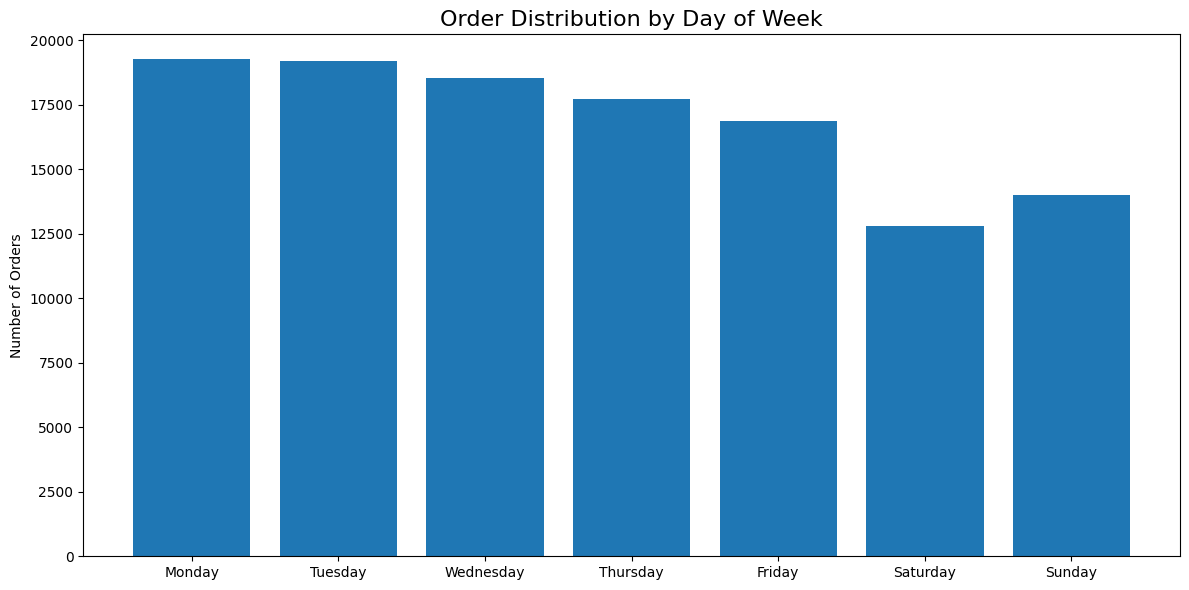

C:\Users\anast\AppData\Local\Temp\ipykernel_31812\4000273011.py:115: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_tod = df.groupby('time_of_day').size()


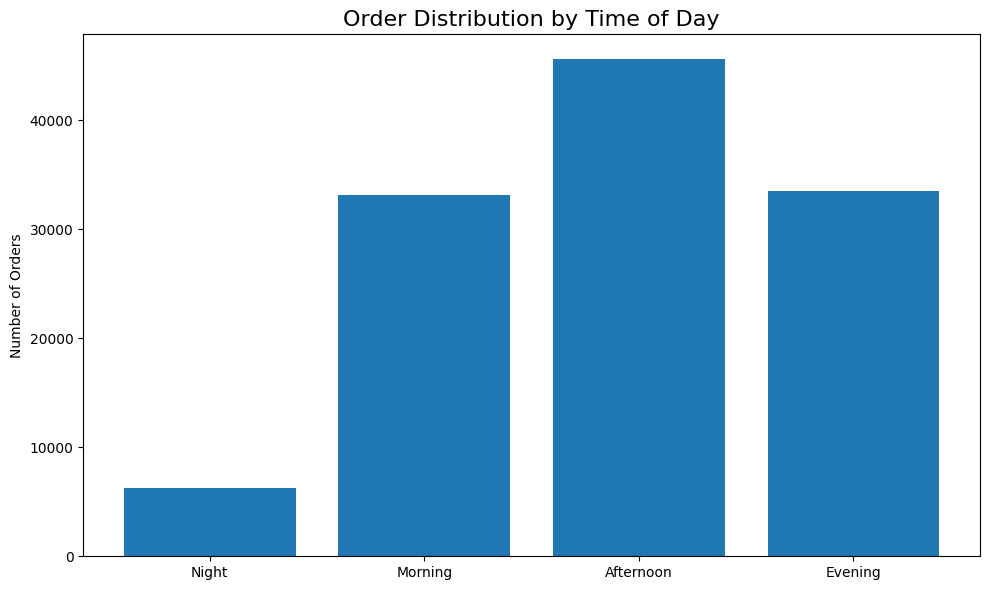

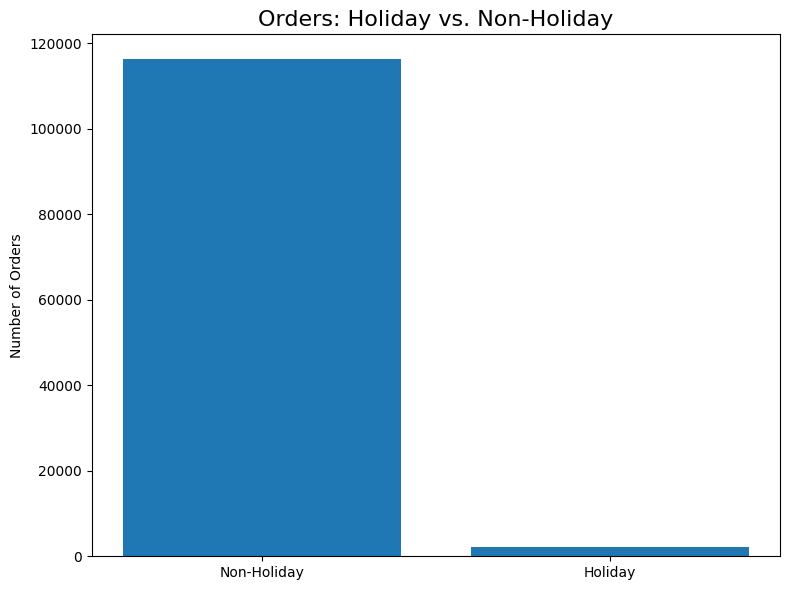

In [28]:
# Enhanced temporal feature engineering
def enrich_temporal_features(df):
    # Ensure order_purchase_date is datetime
    if not pd.api.types.is_datetime64_dtype(df['order_purchase_date']):
        df['order_purchase_date'] = pd.to_datetime(df['order_purchase_date'])
    
    # Extract basic time components
    df['year'] = df['order_purchase_date'].dt.year
    df['month'] = df['order_purchase_date'].dt.month
    df['day'] = df['order_purchase_date'].dt.day
    df['hour'] = df['order_purchase_date'].dt.hour
    df['day_of_week'] = df['order_purchase_date'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 5=Sat, 6=Sun
    
    # Time of day categories
    df['time_of_day'] = pd.cut(
        df['hour'], 
        bins=[0, 6, 12, 18, 24], 
        labels=['Night', 'Morning', 'Afternoon', 'Evening'],
        include_lowest=True
    )
    
    # Week of the month (1-5)
    df['week_of_month'] = ((df['day'] - 1) // 7) + 1
    
    # Part of month (beginning, middle, end)
    df['part_of_month'] = pd.cut(
        df['day'], 
        bins=[0, 10, 20, 32], 
        labels=['Beginning', 'Middle', 'End'],
        include_lowest=True
    )
    
    # Quarter of the year
    df['quarter'] = ((df['month'] - 1) // 3) + 1
    
    # Month of the year (name)
    month_names = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    df['month_name'] = df['month'].map(month_names)
    
    # Season (for Brazil, seasons are inverted compared to Northern Hemisphere)
    season_mapping = {
        1: 'Summer', 2: 'Summer', 3: 'Fall', 4: 'Fall', 5: 'Fall',
        6: 'Winter', 7: 'Winter', 8: 'Winter', 9: 'Spring', 10: 'Spring',
        11: 'Spring', 12: 'Summer'
    }
    df['season'] = df['month'].map(season_mapping)
    
    # Brazil holidays (example of major ones)
    holidays = {
        '2016-01-01': 'New Year',
        '2016-02-09': 'Carnival',
        '2016-03-25': 'Good Friday',
        '2016-04-21': 'Tiradentes Day',
        '2016-05-01': 'Labor Day',
        '2016-09-07': 'Independence Day',
        '2016-10-12': 'Our Lady of Aparecida',
        '2016-11-02': 'All Souls Day',
        '2016-11-15': 'Republic Proclamation Day',
        '2016-12-25': 'Christmas',
        '2017-01-01': 'New Year',
        '2017-02-28': 'Carnival',
        '2017-04-14': 'Good Friday',
        '2017-04-21': 'Tiradentes Day',
        '2017-05-01': 'Labor Day',
        '2017-09-07': 'Independence Day',
        '2017-10-12': 'Our Lady of Aparecida',
        '2017-11-02': 'All Souls Day',
        '2017-11-15': 'Republic Proclamation Day',
        '2017-12-25': 'Christmas',
        '2018-01-01': 'New Year',
        '2018-02-13': 'Carnival',
        '2018-03-30': 'Good Friday',
        '2018-04-21': 'Tiradentes Day',
        '2018-05-01': 'Labor Day',
        '2018-09-07': 'Independence Day',
        '2018-10-12': 'Our Lady of Aparecida',
        '2018-11-02': 'All Souls Day',
        '2018-11-15': 'Republic Proclamation Day',
        '2018-12-25': 'Christmas'
    }
    
    # Convert date to string format matching keys in holidays dictionary
    date_str = df['order_purchase_date'].dt.strftime('%Y-%m-%d')
    df['is_holiday'] = date_str.isin(holidays.keys()).astype(int)
    
    # Get the holiday name if it's a holiday
    df['holiday_name'] = date_str.map(holidays)
    
    # Days to closest holiday (forward and backward)
    # This is computationally intensive, so consider if you really need it
    
    return df

# Apply enhanced temporal features
df = enrich_temporal_features(df)

# Visualize day of week distribution
plt.figure(figsize=(12, 6))
order_dow = df.groupby('day_of_week').size()
plt.bar(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    order_dow.values
)
plt.title('Order Distribution by Day of Week', size=16)
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Visualize time of day distribution
plt.figure(figsize=(10, 6))
order_tod = df.groupby('time_of_day').size()
plt.bar(order_tod.index, order_tod.values)
plt.title('Order Distribution by Time of Day', size=16)
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Orders by holiday vs non-holiday
plt.figure(figsize=(8, 6))
holiday_orders = df.groupby('is_holiday').size()
plt.bar(['Non-Holiday', 'Holiday'], holiday_orders.values)
plt.title('Orders: Holiday vs. Non-Holiday', size=16)
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

### Separation between Numerical and Categorical Features

In [29]:
# Numerical Features
num_features = df.select_dtypes(exclude=[np.object_, pd.CategoricalDtype]).columns
df[num_features].describe()

C:\Users\anast\AppData\Local\Temp\ipykernel_31812\4045701273.py:2: UserWarning: Instantiating CategoricalDtype without any arguments.Pass a CategoricalDtype instance to silence this warning.
  num_features = df.select_dtypes(exclude=[np.object_, pd.CategoricalDtype]).columns


order_item_id          price  freight_value  seller_zip_code_prefix  \
count  117604.000000  117604.000000  117604.000000           117604.000000   
mean        1.195920     120.822849      20.045551            24442.886483   
min         1.000000       0.850000       0.000000             1001.000000   
25%         1.000000      39.900000      13.080000             6429.000000   
50%         1.000000      74.900000      16.290000            13660.000000   
75%         1.000000     134.900000      21.190000            28035.000000   
max        21.000000    6735.000000     409.680000            99730.000000   
std         0.697721     184.477367      15.861351            27573.802989   

       customer_zip_code_prefix  payment_sequential  payment_installments  \
count             118434.000000       118431.000000         118431.000000   
mean               35034.264392            1.094207              2.937398   
min                 1003.000000            1.000000              0.000000   
25%                11310.000000            1.000000              1.000000   
50%                24240.000000            1.000000              2.000000   
75%                58464.500000            1.000000              4.000000   
max                99990.000000           29.000000             24.000000   
std                29819.290218            0.728290              2.774164   

       payment_value            order_purchase_date           year  \
count  118431.000000                         118434  118434.000000   
mean      172.849395  2017-12-30 04:00:24.559636480    2017.536324   
min         0.000000            2016-09-04 21:15:19    2016.000000   
25%        60.860000  2017-09-11 12:53:55.249999872    2017.000000   
50%       108.200000     2018-01-17 17:57:56.500000    2018.000000   
75%       189.245000            2018-05-03 19:05:01    2018.000000   
max     13664.080000            2018-10-17 17:30:18    2018.000000   
std       268.259831                            NaN       0.505492   

               month            day          hour    day_of_week  \
count  118434.000000  118434.000000  118434.00000  118434.000000   
mean        6.033723      15.547393      14.75605       2.745056   
min         1.000000       1.000000       0.00000       0.000000   
25%         3.000000       8.000000      11.00000       1.000000   
50%         6.000000      16.000000      15.00000       3.000000   
75%         8.000000      23.000000      19.00000       4.000000   
max        12.000000      31.000000      23.00000       6.000000   
std         3.231805       8.668076       5.32724       1.960629   

          is_weekend  week_of_month        quarter     is_holiday  
count  118434.000000  118434.000000  118434.000000  118434.000000  
mean        0.226497       2.672138       2.356536       0.018103  
min         0.000000       1.000000       1.000000       0.000000  
25%         0.000000       2.000000       1.000000       0.000000  
50%         0.000000       3.000000       2.000000       0.000000  
75%         0.000000       4.000000       3.000000       0.000000  
max         1.000000       5.000000       4.000000       1.000000  
std         0.418566       1.250086       1.062274       0.133324

In [30]:
# Categorical Features
exclude = df.drop(columns=['customer_id','order_id','order_purchase_timestamp','product_id','seller_id','customer_unique_id'],axis=1)
cat_features = exclude.select_dtypes(include=[np.object_]).columns
df[cat_features].describe()

order_status product_category_name_english seller_city seller_state  \
count        118434                        115881      117604       117604   
unique            8                            71         611           23   
top       delivered                bed_bath_table   sao paulo           SP   
freq         115038                         11823       29157        83854   

       customer_city customer_state payment_type month_name  season  \
count         118434         118434       118431     118434  118434   
unique          4119             27            5         12       4   
top        sao paulo             SP  credit_card        Aug  Winter   
freq           18738          49967        87286      12745   36207   

       holiday_name  
count          2144  
unique           10  
top       Labor Day  
freq            439

## Exploratory Data Analysis (EDA)

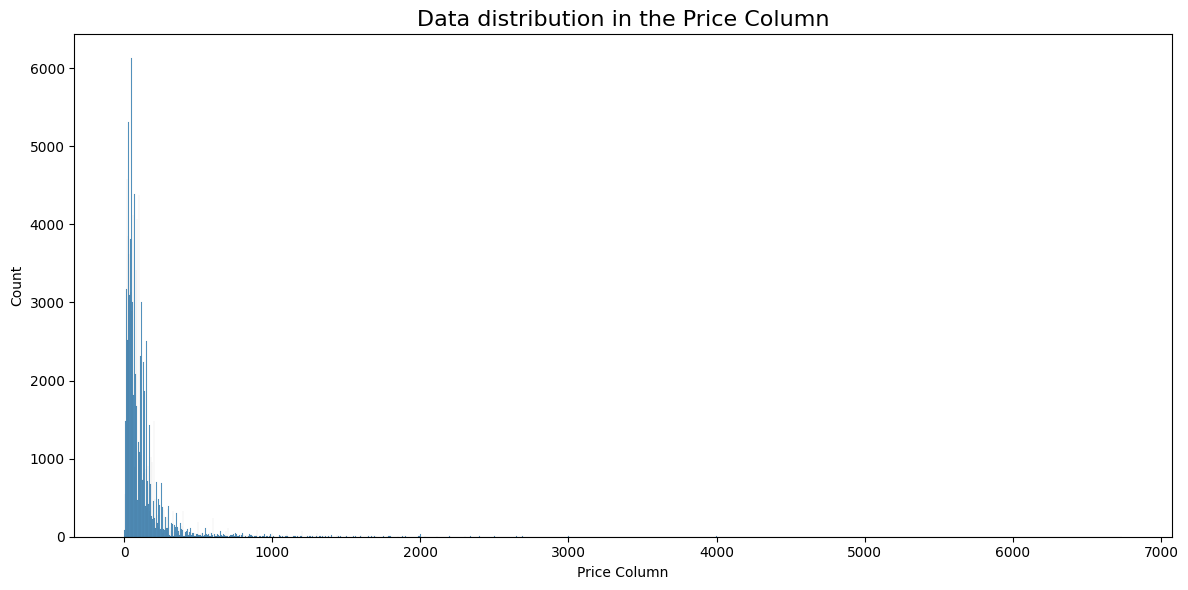

In [31]:
plt.figure( figsize=(12, 6))
sns.histplot(data=df,x='price')
plt.title('Data distribution in the Price Column', size=16)
plt.xlabel('Price Column')
plt.tight_layout()
plt.show()

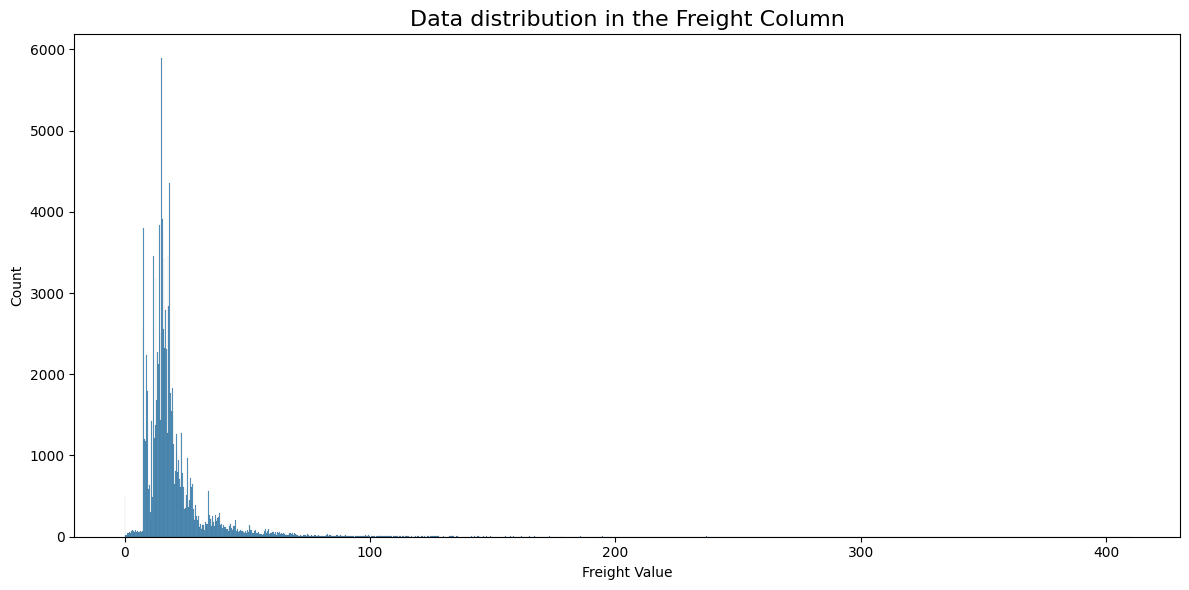

In [32]:
plt.figure( figsize=(12, 6))
sns.histplot(data=df,x='freight_value')
plt.title('Data distribution in the Freight Column', size=16)
plt.xlabel('Freight Value')
plt.tight_layout()
plt.show()

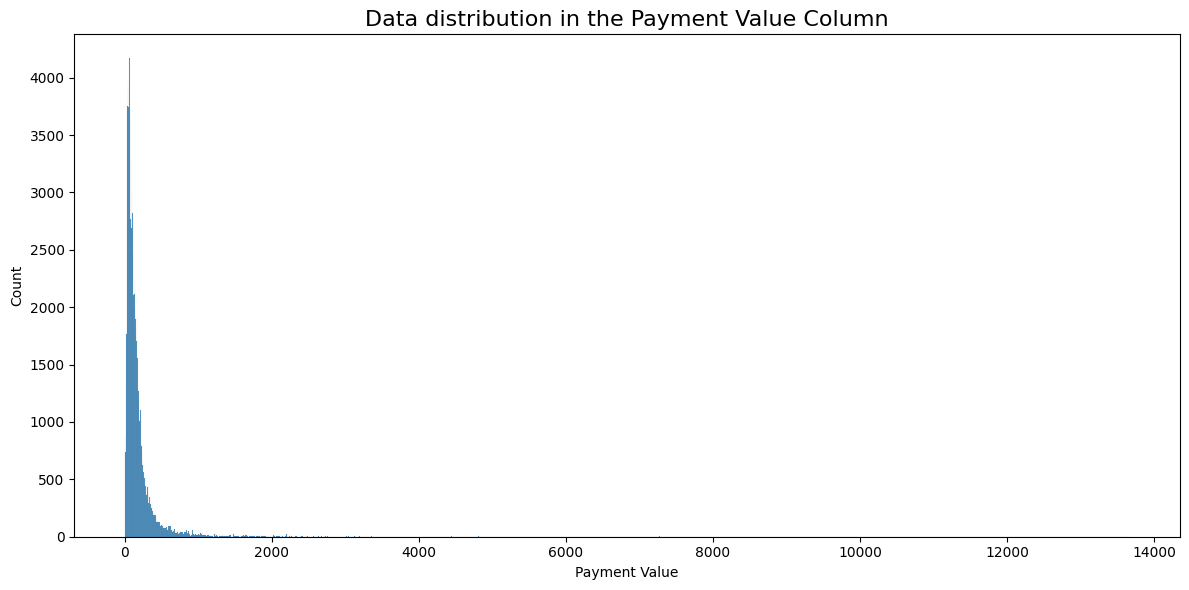

In [33]:
plt.figure( figsize=(12, 6))
sns.histplot(data=df,x='payment_value')
plt.title('Data distribution in the Payment Value Column', size=16)
plt.xlabel('Payment Value')
plt.tight_layout()
plt.show()

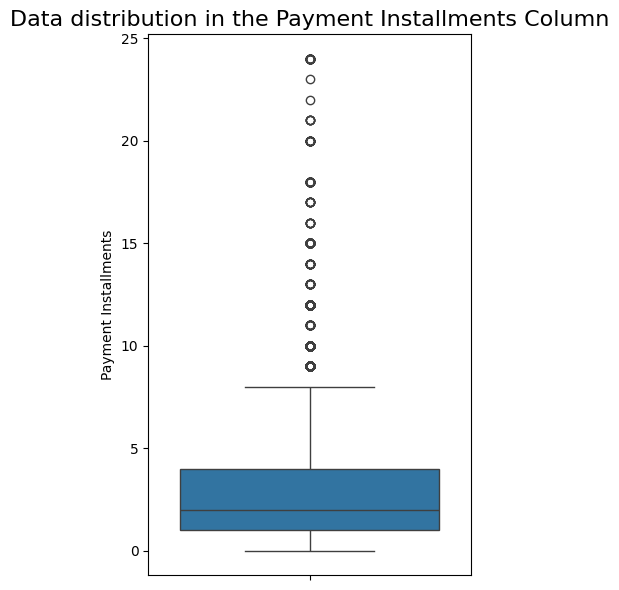

In [34]:
plt.figure( figsize=(4, 6))
sns.boxplot(data = df,y='payment_installments')
plt.title('Data distribution in the Payment Installments Column', size=16)
plt.ylabel('Payment Installments')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Heatmap'}>

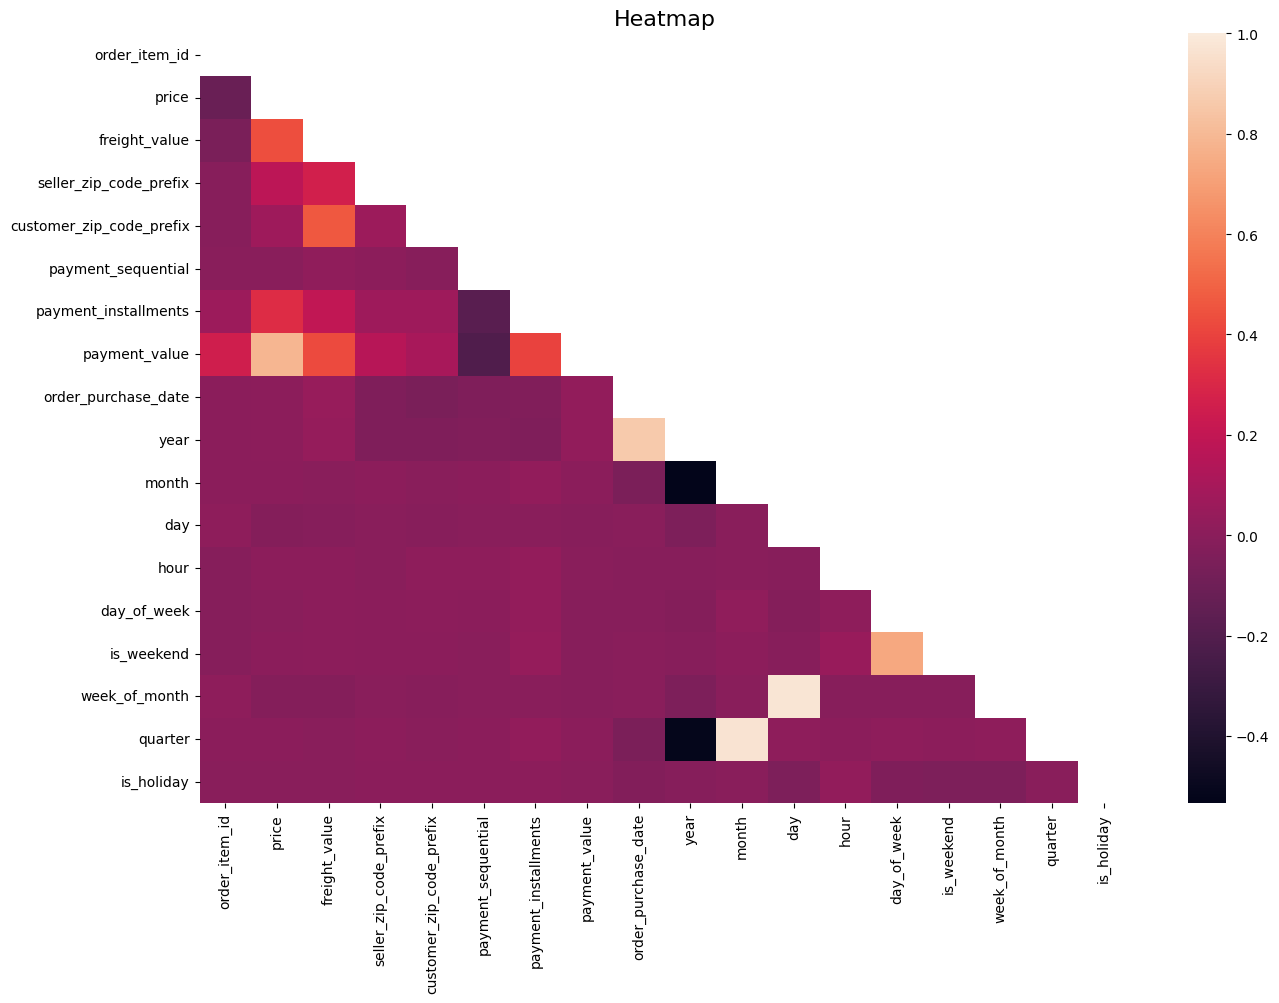

In [35]:
# Plot a heatmap to see correlation among numerical features
mask = np.zeros_like(df[num_features].corr(method='spearman')) 
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15, 10))
plt.title('Heatmap', size=16)
sns.heatmap(df[num_features].corr(method='spearman'), mask=mask, vmax=1)

In [36]:
df[['customer_unique_id','order_id', 'order_purchase_date']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

customer_unique_id  order_id  order_purchase_date
customer_unique_id             1.000000  0.961711             0.961610
order_id                       0.961711  1.000000             0.994409
order_purchase_date            0.961610  0.994409             1.000000

In [37]:
df.year.unique()

array([2017, 2018, 2016], dtype=int32)

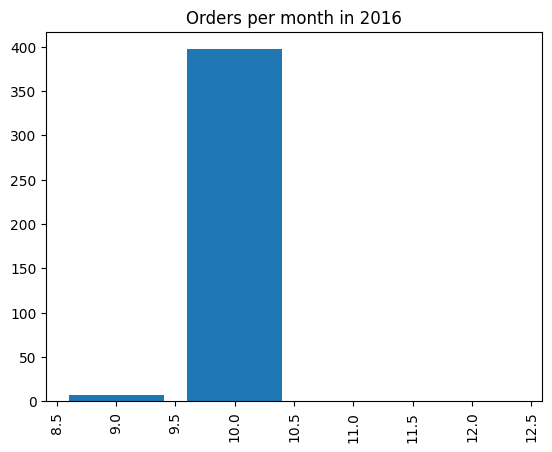

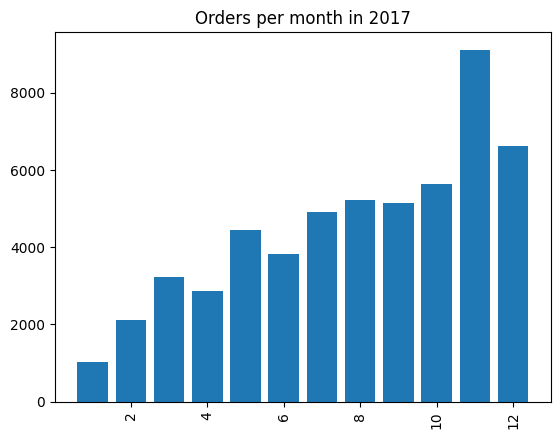

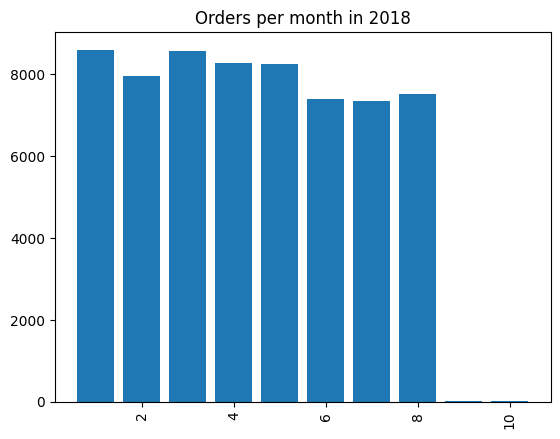

In [38]:
# names = customers[customers['customer_state']=="SP"]['customer_city'].value_counts().head(20).index
# heights = customers[customers['customer_state']=="SP"]['customer_city'].value_counts().head(20)
for year in df['year'].sort_values().unique():
    _months = df[df['year']==year]['month'].value_counts().index.sort_values()
    _orders = df[df['year']==year].groupby('month')['order_id'].count().values

    plt.bar(_months, _orders)

    plt.xticks(rotation=90)
    plt.title(f'Orders per month in {year}')
    plt.show()

### Orders

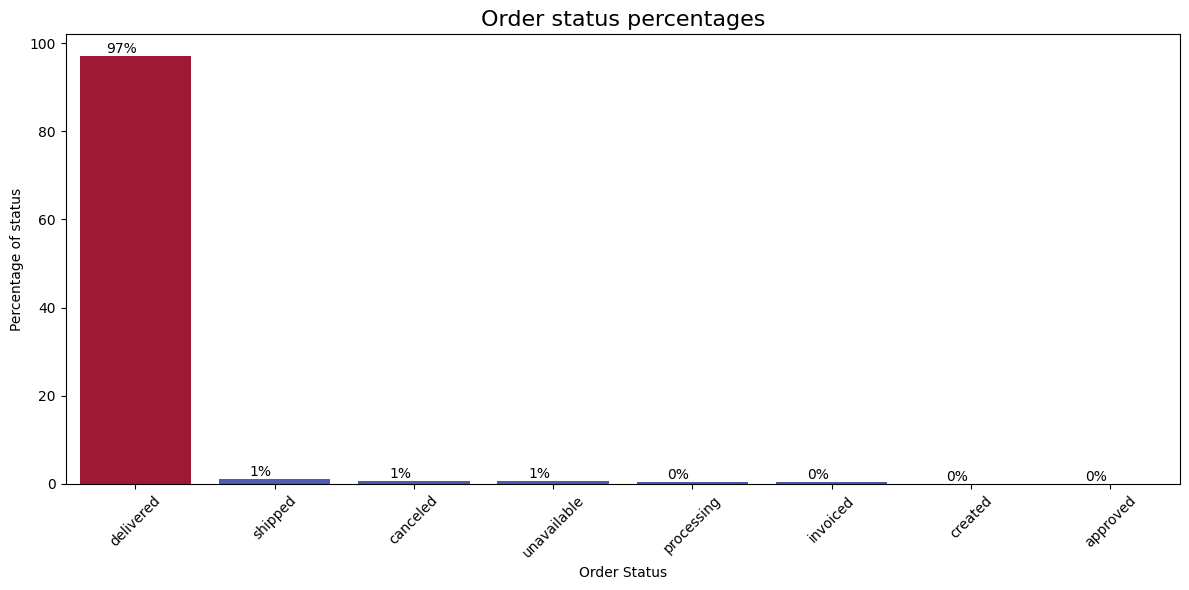

In [39]:
plt.figure(figsize=(12, 6))
df_price_cat = df['order_status'].value_counts()/len(df['order_status'])*100
graph = sns.barplot(x=df_price_cat.index, y=df_price_cat.values, data = df.groupby('order_status').count(), hue=df_price_cat, palette='coolwarm', legend=False)
for p in graph.patches:
        graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title('Order status percentages', size=16)
plt.xlabel('Order Status')
plt.ylabel('Percentage of status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

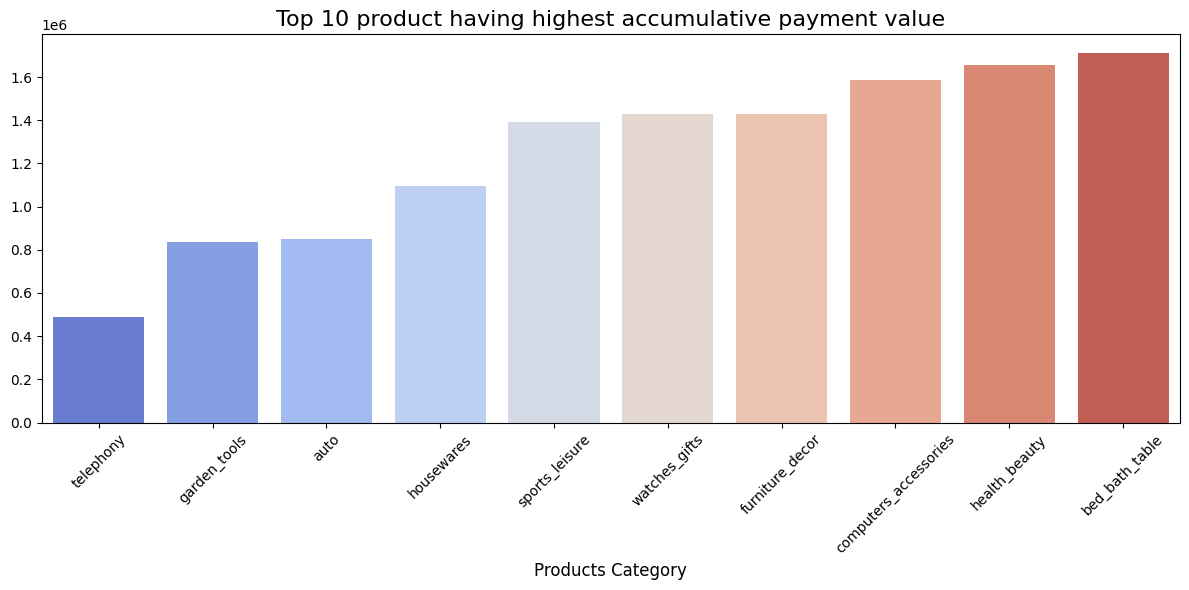

In [40]:
top_10_product = df['product_category_name_english'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_product = df[df['product_category_name_english'].isin(top_10_product)]

plt.figure(figsize=(12, 6))
df_top10 = df_top_10_product.groupby('product_category_name_english')['payment_value'].sum().sort_values()
sns.barplot(x=df_top10.index, y=df_top10.values, hue=top_10_product, palette='coolwarm', legend=False)    
plt.title('Top 10 product having highest accumulative payment value', size=16)
plt.xlabel('Products Category', size=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
df_top_10_product.groupby('product_category_name_english')['payment_value'].sum().sort_values()

product_category_name_english
telephony                 486882.05
garden_tools              838280.75
auto                      852294.33
housewares               1094758.13
sports_leisure           1392127.56
watches_gifts            1429216.68
furniture_decor          1430176.39
computers_accessories    1585330.45
health_beauty            1657373.12
bed_bath_table           1712553.67
Name: payment_value, dtype: float64

C:\Users\anast\AppData\Local\Temp\ipykernel_31812\470920320.py:3: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  graph = sns.barplot(x=df_pay_type.index, y=df_pay_type.values, hue=df_pay_type, palette=sns.color_palette('crest'), legend=False)


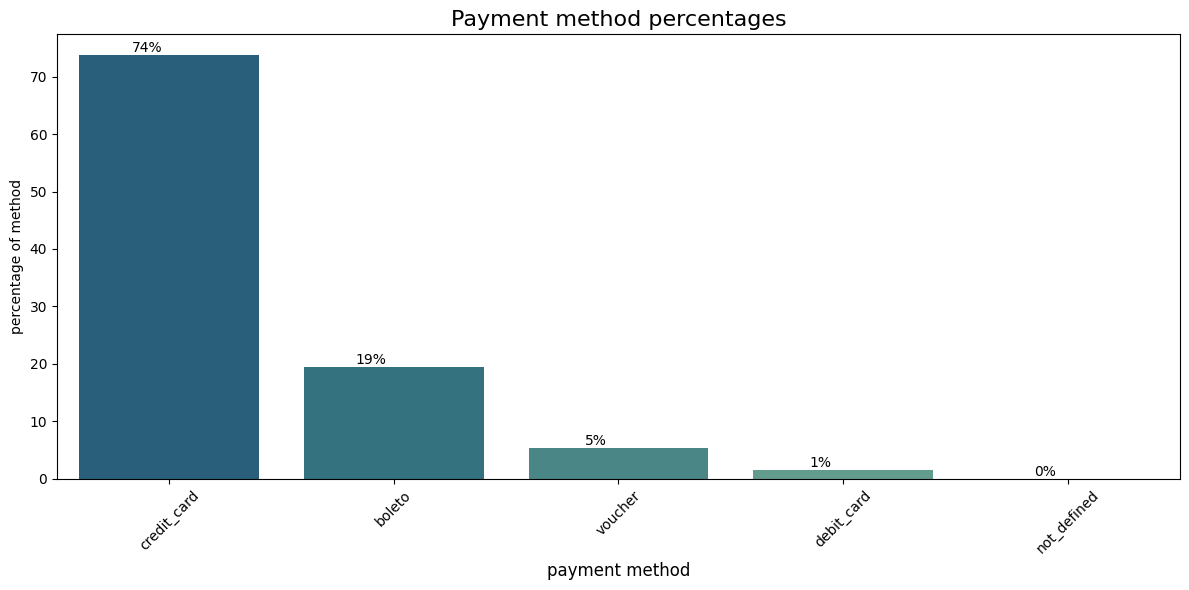

In [42]:
plt.figure(figsize=(12, 6))
df_pay_type = df['payment_type'].value_counts()/len(df['payment_type'])*100
graph = sns.barplot(x=df_pay_type.index, y=df_pay_type.values, hue=df_pay_type, palette=sns.color_palette('crest'), legend=False)  
for p in graph.patches:
        graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title('Payment method percentages', size=16)
plt.ylabel('percentage of method')
plt.xlabel('payment method', size=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
top_10_customer_city = df['customer_city'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_customer_city = df[df['customer_city'].isin(top_10_customer_city)]

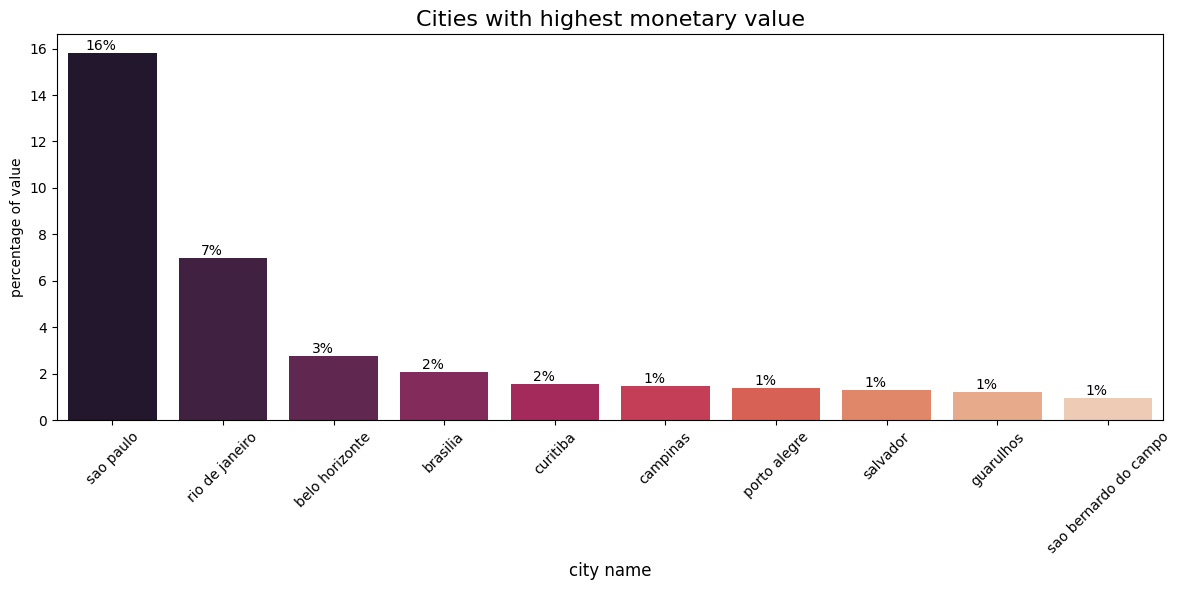

In [44]:
top_10_customer_city = df['customer_city'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_customer_city = df[df['customer_city'].isin(top_10_customer_city)]

plt.figure(figsize=(12, 6))
df_price_cat = df_top_10_customer_city['customer_city'].value_counts()/len(df['customer_city'])*100
pal = sns.color_palette('rocket_r', len(df_price_cat))
graph = sns.barplot(x=df_price_cat.index, y=df_price_cat.values, hue=df_price_cat, palette=pal, legend=False)
for p in graph.patches:
        graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title('Cities with highest monetary value', size=16)
plt.ylabel('percentage of value')
plt.xlabel('city name', size=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

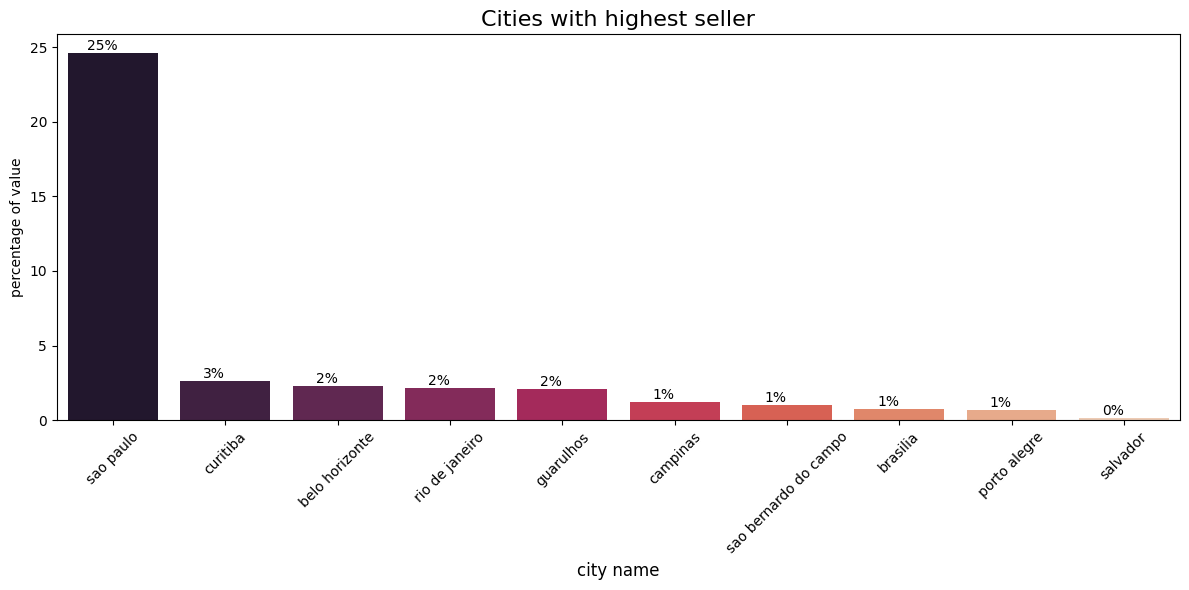

In [45]:
top_10_seller_city = df['seller_city'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_seller_city = df[df['seller_city'].isin(top_10_customer_city)]

plt.figure(figsize=(12, 6))
df_seller_cat = df_top_10_seller_city['seller_city'].value_counts()/len(df['seller_city'])*100
pal = sns.color_palette('rocket_r', len(df_seller_cat))
graph = sns.barplot(x=df_seller_cat.index, y=df_seller_cat.values, hue=df_seller_cat, palette=pal, legend=False) 
for p in graph.patches:
        graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title('Cities with highest seller', size=16)
plt.ylabel('percentage of value')
plt.xlabel('city name', size=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Handle Data Anomallies
This includes missing values, outliers, anomalies, duplication, etc.

In [46]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_item_id                       830
product_id                          830
seller_id                           830
price                               830
freight_value                       830
product_category_name_english      2553
seller_zip_code_prefix              830
seller_city                         830
seller_state                        830
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
order_purchase_date                   0
year                                  0
month                                 0
day                                   0


In [47]:
df[df['seller_id'].isna()]['order_status'].unique()

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

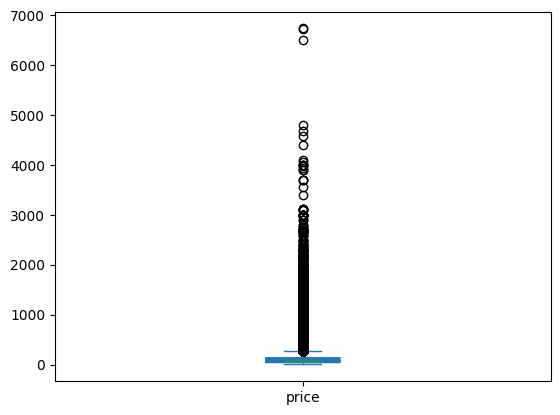

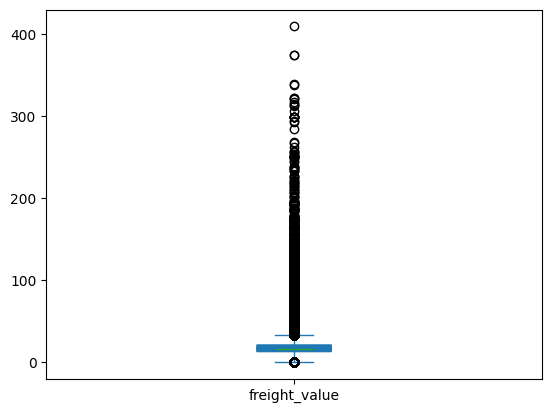

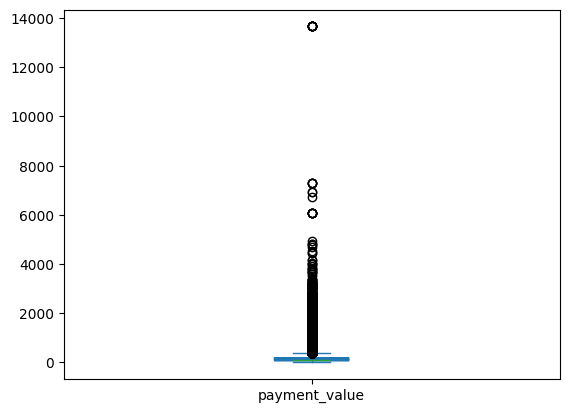

In [48]:
outliers = ['price','freight_value','payment_value']

for cols in df[outliers]:
  df[cols].plot(kind='box', notch=True, patch_artist=True)
  plt.show()

In [49]:
# Count IQR to find outliers for
# Freight Value, Payment Value, Price
def count_outliers(columns_name_with_outliers):
    outliers_list = []
    for i in columns_name_with_outliers:
        low_outliers = df[i].describe().iloc[4] - 1.5*abs(df[i].describe().iloc[4] - df[i].describe().iloc[6])
        upper_outliers =  df[i].describe().iloc[6] + 1.5*abs(df[i].describe().iloc[4] - df[i].describe().iloc[6])
        print(i + f'    outliers is bellow {low_outliers}, and above {upper_outliers}')
        outliers_list.append([i,low_outliers,upper_outliers])
    for i in range(len(outliers_list)):
        outliers_count_bottom = df[df[outliers_list[i][0]] < outliers_list[i][1]][outliers_list[i][0]].count()
        outliers_count_upper = df[df[outliers_list[i][0]] > outliers_list[i][2]][outliers_list[i][0]].count()
        print(f'numbers outliers in columns {outliers_list[i][0]} is bottom outliers = {outliers_count_bottom} and upper outliers = {outliers_count_upper} ')
    for i in range(len(outliers_list)):
        category_1 =df[df[outliers_list[i][0]] < outliers_list[i][1]]['product_category_name_english'].value_counts().head(5).index
        category_2 =df[df[outliers_list[i][0]] > outliers_list[i][2]]['product_category_name_english'].value_counts().head(5).index
        print(f'{[outliers_list[i][0]]} the category is {list(category_1)} and {list(category_2)}')    
count_outliers(outliers)

price    outliers is bellow -102.6, and above 277.4
freight_value    outliers is bellow 0.9149999999999974, and above 33.355000000000004
payment_value    outliers is bellow -131.71749999999997, and above 381.8225
numbers outliers in columns price is bottom outliers = 0 and upper outliers = 8844 
numbers outliers in columns freight_value is bottom outliers = 534 and upper outliers = 12149 
numbers outliers in columns payment_value is bottom outliers = 0 and upper outliers = 9580 
['price'] the category is [] and ['health_beauty', 'watches_gifts', 'sports_leisure', 'auto', 'cool_stuff']
['freight_value'] the category is ['watches_gifts', 'furniture_decor', 'garden_tools', 'health_beauty', 'housewares'] and ['furniture_decor', 'office_furniture', 'garden_tools', 'housewares', 'computers_accessories']
['payment_value'] the category is [] and ['computers_accessories', 'health_beauty', 'watches_gifts', 'bed_bath_table', 'furniture_decor']


In [50]:
# There anomaly in payment type
df[df['payment_type'] == 'not_defined']

order_id                       customer_id  \
1352   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
47586  4637ca194b6387e2d538dc89b124b0ee  a73c1f73f5772cf801434bf984b0b1a7   
47962  c8c528189310eaa44a745b8d9d26908b  197a2a6a77da93f678ea0d379f21da0a   

      order_status order_purchase_timestamp  order_item_id product_id  \
1352      canceled      2018-08-28 15:26:39            NaN        NaN   
47586     canceled      2018-09-03 14:14:25            NaN        NaN   
47962     canceled      2018-08-28 20:05:14            NaN        NaN   

      seller_id  price  freight_value product_category_name_english  ...  \
1352        NaN    NaN            NaN                           NaN  ...   
47586       NaN    NaN            NaN                           NaN  ...   
47962       NaN    NaN            NaN                           NaN  ...   

       day_of_week is_weekend time_of_day week_of_month  part_of_month  \
1352             1          0   Afternoon             4            End   
47586            0          0   Afternoon             1      Beginning   
47962            1          0     Evening             4            End   

      quarter month_name  season is_holiday  holiday_name  
1352        3        Aug  Winter          0           NaN  
47586       3        Sep  Spring          0           NaN  
47962       3        Aug  Winter          0           NaN  

[3 rows x 36 columns]

### Geolocation preprocessing

In [51]:
# Step 1: Ensure data types are consistent
def prepare_zip_codes(df, zip_column):
    # Convert zip codes to string type
    df[zip_column] = df[zip_column].astype(str)
    # Strip any whitespace
    df[zip_column] = df[zip_column].str.strip()
    return df

# Step 2: Create a fallback mechanism for geolocation
def get_location_mappings(geolocation_df):
    # Prepare primary mapping (state + zip)
    state_zip_mapping = {}
    for _, row in geolocation_df.iterrows():
        key = (row['geolocation_state'], row['geolocation_zip_code_prefix'])
        if key not in state_zip_mapping:
            state_zip_mapping[key] = (row['geolocation_lat'], row['geolocation_lng'])
    
    # Prepare fallback mapping (just state)
    state_mapping = {}
    state_groups = geolocation_df.groupby('geolocation_state')
    for state, group in state_groups:
        # Use the centroid of all locations in the state
        avg_lat = group['geolocation_lat'].mean()
        avg_lng = group['geolocation_lng'].mean()
        state_mapping[state] = (avg_lat, avg_lng)
    
    # Prepare zip-only fallback
    zip_mapping = {}
    zip_groups = geolocation_df.groupby('geolocation_zip_code_prefix')
    for zip_prefix, group in zip_groups:
        # Most common lat/lng for this zip
        location_counts = group.groupby(['geolocation_lat', 'geolocation_lng']).size()
        if not location_counts.empty:
            zip_mapping[zip_prefix] = location_counts.idxmax()
    
    return state_zip_mapping, state_mapping, zip_mapping

# Step 3: Apply coordinates with fallback logic
def apply_coordinates_with_fallback(df, state_zip_mapping, state_mapping, zip_mapping, 
                                   state_col, zip_col, lat_col, lng_col):
    """
    Apply coordinates to DataFrame with multiple fallback options
    """
    # Create output columns if they don't exist
    if lat_col not in df.columns:
        df[lat_col] = None
    if lng_col not in df.columns:
        df[lng_col] = None
    
    # Track how many records were filled by each method
    stats = {'primary': 0, 'state_fallback': 0, 'zip_fallback': 0, 'missing': 0}
    
    # Process each row
    for idx, row in df.iterrows():
        state = row[state_col]
        zip_prefix = row[zip_col]
        
        # Try primary mapping (state + zip)
        if (state, zip_prefix) in state_zip_mapping:
            df.at[idx, lat_col], df.at[idx, lng_col] = (state_zip_mapping[(state, zip_prefix)])
            stats['primary'] += 1
        
        # Fallback to zip code only
        elif zip_prefix in zip_mapping:
            df.at[idx, lat_col], df.at[idx, lng_col] = zip_mapping[zip_prefix]
            stats['zip_fallback'] += 1
        
        # Fallback to state centroid
        elif state in state_mapping:
            df.at[idx, lat_col], df.at[idx, lng_col] = state_mapping[state]
            stats['state_fallback'] += 1
        
        else:
            stats['missing'] += 1
    
    print(f"Coordinate mapping stats: {stats}")
    return df

In [52]:
seller = pd.read_csv('olist_dataset/olist_sellers_dataset.csv')
seller = prepare_zip_codes(seller, 'seller_zip_code_prefix')
customer = pd.read_csv('olist_dataset/olist_customers_dataset.csv')
customer = prepare_zip_codes(customer, 'customer_zip_code_prefix')

In [53]:
state_zip_mapping, state_mapping, zip_mapping = get_location_mappings(geolocation)

### Seller distribution

In [54]:
# sell_locate = geoloc.merge(seller, on = 'zip_code_prefix', how = 'outer')
dg_geo_seller = apply_coordinates_with_fallback(seller, state_zip_mapping, state_mapping, zip_mapping,
                                                'seller_state', 'seller_zip_code_prefix', 
                                                'seller_lat', 'seller_lng')

maps = folium.Map(location = [dg_geo_seller.seller_lat.mean(), dg_geo_seller.seller_lng.mean()], 
                  tiles = "https://tile.openstreetmap.org/{z}/{x}/{y}.png", 
                  attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', 
                  zoom_start = 5)

HeatMap(data=dg_geo_seller[['seller_lat', 'seller_lng']], 
        radius=8, 
        max_zoom=13).add_to(maps)

display(maps)

Coordinate mapping stats: {'primary': 0, 'state_fallback': 3095, 'zip_fallback': 0, 'missing': 0}


### Customer distribution

In [55]:
dg_geo_cust = apply_coordinates_with_fallback(customer, state_zip_mapping, state_mapping, zip_mapping,
                                              'customer_state', 'customer_zip_code_prefix', 
                                              'customer_lat', 'customer_lng')

maps = folium.Map(location = [dg_geo_cust.customer_lat.mean(), dg_geo_cust.customer_lng.mean()], 
                  tiles = "https://tile.openstreetmap.org/{z}/{x}/{y}.png", 
                  attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', 
                  zoom_start = 5)

HeatMap(data=dg_geo_cust[['customer_lat', 'customer_lng']], 
        radius=8, 
        max_zoom=13).add_to(maps)

display(maps)

Coordinate mapping stats: {'primary': 0, 'state_fallback': 99441, 'zip_fallback': 0, 'missing': 0}


### Misspellings

In [56]:
df['product_category_name_english'].unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery', nan,
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'christmas_supplies',
       'fashion_bags_accessories', 'musical_instruments',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_confort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_sho

In [57]:
for cols in df[cat_features]:
  unique_values = df[df[cols].notna()][cols].unique()
  sorted_unique_values = sorted(unique_values)
  print(f'Unique values of {cols} column are {sorted_unique_values}')

Unique values of order_status column are ['approved', 'canceled', 'created', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']
Unique values of product_category_name_english column are ['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_

### Duplication

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.groupby('order_id')['order_id'].count().sort_values(ascending=False).head(50)

order_id
895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
c6492b842ac190db807c15aff21a7dd6    24
465c2e1bee4561cb39e0db8c5993aafc    24
68986e4324f6a21481df4e6e89abcf01    24
a3725dfe487d359b5be08cac48b64ec5    24
285c2e15bebd4ac83635ccc563dc71f4    22
8272b63d03f5f79c56e9e4120aec44ef    21
1c11d0f4353b31ac3417fbfa5f0f2a8a    21
958c6a70e60365b576dd696ad29bbca2    21
364f451ee38a4268d7c15d317021eb35    20
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
ee9ca989fc93ba09a6eddc250ce01742    19
3a1ce4053005d669ac4e0047a13573cf    16
9ef13efd6949e4573a18964dd1bbe7f5    15
4c08f008753759d67d8ef45942f1a891    15
428a2f660dc84138d969ccd69a0ab6d5    15
4bfcba9e084f46c8e3cb49b0fa6e6159    15
afc091f97bfa9985b6ab413ad1a9891b    15
21577126c19bf11a0b91592e5844ba78    15
9bdc4d4c71aa1de4606060929dee888c    14
4689b1816de42507a7d63a4617383c59    14
133a94aa41cab8ad

## Preprocessing

### Handle cities

In [60]:
import pandas as pd
import requests
from fuzzywuzzy import process, fuzz
import unicodedata
import json

def fetch_official_brazilian_cities():
    """
    Fetch the official list of Brazilian municipalities from IBGE API,
    with robust error handling for inconsistent data structures.
    """
    try:
        url = "https://servicodados.ibge.gov.br/api/v1/localidades/municipios"
        response = requests.get(url)
        data = response.json()
        
        # Extract relevant information with careful navigation of the nested structure
        cities = []
        errors = 0
        
        for city in data:
            try:
                city_dict = {'ibge_code': city.get('id')}
                
                # Get city name (this should always be present)
                city_dict['city_name'] = city.get('nome', 'Unknown')
                
                # Get state information - handle potentially missing structure
                try:
                    # Try the standard path
                    city_dict['state_code'] = city['microrregiao']['mesorregiao']['UF']['sigla']
                    city_dict['state_name'] = city['microrregiao']['mesorregiao']['UF']['nome']
                except (KeyError, TypeError):
                    # Alternative paths to try
                    try:
                        # Try direct UF path if available
                        if 'UF' in city:
                            city_dict['state_code'] = city['UF']['sigla']
                            city_dict['state_name'] = city['UF']['nome']
                        # Try regiao-immediata path (newer IBGE structure)
                        elif 'regiao-immediata' in city:
                            city_dict['state_code'] = city['regiao-immediata']['regiao-intermediaria']['UF']['sigla']
                            city_dict['state_name'] = city['regiao-immediata']['regiao-intermediaria']['UF']['nome']
                        else:
                            # Determine state from city code (first 2 digits of IBGE code)
                            state_code_map = {
                                '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA',
                                '16': 'AP', '17': 'TO', '21': 'MA', '22': 'PI', '23': 'CE',
                                '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL', '28': 'SE',
                                '29': 'BA', '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
                                '41': 'PR', '42': 'SC', '43': 'RS', '50': 'MS', '51': 'MT',
                                '52': 'GO', '53': 'DF'
                            }
                            
                            # Extract state code from IBGE code
                            ibge_code_str = str(city.get('id', ''))
                            if len(ibge_code_str) >= 2:
                                state_prefix = ibge_code_str[:2]
                                city_dict['state_code'] = state_code_map.get(state_prefix, 'Unknown')
                                city_dict['state_name'] = 'Unknown'  # Would need another mapping for full names
                            else:
                                city_dict['state_code'] = 'Unknown'
                                city_dict['state_name'] = 'Unknown'
                    except (KeyError, TypeError):
                        city_dict['state_code'] = 'Unknown'
                        city_dict['state_name'] = 'Unknown'
                        errors += 1
                
                # Only add cities with a valid state code
                if city_dict['state_code'] != 'Unknown':
                    cities.append(city_dict)
                else:
                    errors += 1
                    
            except Exception as e:
                print(f"Error processing city: {city.get('nome', 'Unknown')}: {e}")
                errors += 1
                continue
        
        # Convert to DataFrame
        cities_df = pd.DataFrame(cities)
        
        # Normalize city names (Title case)
        cities_df['city_name'] = cities_df['city_name'].str.title()
        
        # Create standard city-state pairs for matching
        cities_df['city_state_pair'] = cities_df['city_name'] + ', ' + cities_df['state_code']
        
        # Create versions without accents for matching
        cities_df['city_name_no_accent'] = cities_df['city_name'].apply(
            lambda x: ''.join(c for c in unicodedata.normalize('NFD', str(x)) 
                             if not unicodedata.combining(c))
        )
        
        # Save for future use
        cities_df.to_csv('brazilian_cities_reference.csv', index=False)
        print(f"Successfully fetched {len(cities_df)} Brazilian municipalities")
        if errors > 0:
            print(f"Encountered {errors} errors while processing cities")
        
        return cities_df
        
    except Exception as e:
        print(f"Error fetching official cities: {e}")
        
        # Try to load previously saved file
        try:
            cities_df = pd.read_csv('brazilian_cities_reference.csv')
            print(f"Loaded {len(cities_df)} cities from saved reference file")
            return cities_df
        except:
            print("Could not load saved reference file")
            
            # Last resort: Create a fallback list of Brazilian states
            try:
                print("Creating fallback list with state capitals...")
                fallback_data = [
                    {"city_name": "Rio Branco", "state_code": "AC", "state_name": "Acre"},
                    {"city_name": "Maceió", "state_code": "AL", "state_name": "Alagoas"},
                    {"city_name": "Macapá", "state_code": "AP", "state_name": "Amapá"},
                    {"city_name": "Manaus", "state_code": "AM", "state_name": "Amazonas"},
                    {"city_name": "Salvador", "state_code": "BA", "state_name": "Bahia"},
                    {"city_name": "Fortaleza", "state_code": "CE", "state_name": "Ceará"},
                    {"city_name": "Brasília", "state_code": "DF", "state_name": "Distrito Federal"},
                    {"city_name": "Vitória", "state_code": "ES", "state_name": "Espírito Santo"},
                    {"city_name": "Goiânia", "state_code": "GO", "state_name": "Goiás"},
                    {"city_name": "São Luís", "state_code": "MA", "state_name": "Maranhão"},
                    {"city_name": "Cuiabá", "state_code": "MT", "state_name": "Mato Grosso"},
                    {"city_name": "Campo Grande", "state_code": "MS", "state_name": "Mato Grosso do Sul"},
                    {"city_name": "Belo Horizonte", "state_code": "MG", "state_name": "Minas Gerais"},
                    {"city_name": "Belém", "state_code": "PA", "state_name": "Pará"},
                    {"city_name": "João Pessoa", "state_code": "PB", "state_name": "Paraíba"},
                    {"city_name": "Curitiba", "state_code": "PR", "state_name": "Paraná"},
                    {"city_name": "Recife", "state_code": "PE", "state_name": "Pernambuco"},
                    {"city_name": "Teresina", "state_code": "PI", "state_name": "Piauí"},
                    {"city_name": "Rio de Janeiro", "state_code": "RJ", "state_name": "Rio de Janeiro"},
                    {"city_name": "Natal", "state_code": "RN", "state_name": "Rio Grande do Norte"},
                    {"city_name": "Porto Alegre", "state_code": "RS", "state_name": "Rio Grande do Sul"},
                    {"city_name": "Porto Velho", "state_code": "RO", "state_name": "Rondônia"},
                    {"city_name": "Boa Vista", "state_code": "RR", "state_name": "Roraima"},
                    {"city_name": "Florianópolis", "state_code": "SC", "state_name": "Santa Catarina"},
                    {"city_name": "São Paulo", "state_code": "SP", "state_name": "São Paulo"},
                    {"city_name": "Aracaju", "state_code": "SE", "state_name": "Sergipe"},
                    {"city_name": "Palmas", "state_code": "TO", "state_name": "Tocantins"}
                ]
                # Add major cities to the fallback list
                major_cities = [
                    {"city_name": "Campinas", "state_code": "SP", "state_name": "São Paulo"},
                    {"city_name": "Guarulhos", "state_code": "SP", "state_name": "São Paulo"},
                    {"city_name": "Niterói", "state_code": "RJ", "state_name": "Rio de Janeiro"},
                    {"city_name": "Duque de Caxias", "state_code": "RJ", "state_name": "Rio de Janeiro"},
                    {"city_name": "Contagem", "state_code": "MG", "state_name": "Minas Gerais"},
                    {"city_name": "Uberlândia", "state_code": "MG", "state_name": "Minas Gerais"},
                    # Add more as needed
                ]
                fallback_data.extend(major_cities)
                
                fallback_df = pd.DataFrame(fallback_data)
                
                # Add additional columns for consistency
                fallback_df['ibge_code'] = range(1, len(fallback_df) + 1)  # Placeholder codes
                fallback_df['city_state_pair'] = fallback_df['city_name'] + ', ' + fallback_df['state_code']
                fallback_df['city_name_no_accent'] = fallback_df['city_name'].apply(
                    lambda x: ''.join(c for c in unicodedata.normalize('NFD', str(x)) 
                                    if not unicodedata.combining(c))
                )
                
                fallback_df.to_csv('brazilian_cities_fallback.csv', index=False)
                print(f"Created fallback list with {len(fallback_df)} major Brazilian cities")
                return fallback_df
                
            except Exception as nested_e:
                print(f"Error creating fallback list: {nested_e}")
                return None

c:\Users\anast\Documents\Repos\athtech-igp\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [61]:
try:
    url = "https://servicodados.ibge.gov.br/api/v1/localidades/municipios"
    response = requests.get(url)
    data = response.json()
    print("data", data[1]['microrregiao']['mesorregiao']['UF']['nome'])

    # Extract relevant information
    cities = []
    for city in data:
        cities.append({
            'ibge_code': city['id'],
            'city_name': city['nome'],
            'state_code': city['microrregiao']['mesorregiao']['UF']['sigla'],
            'state_name': city['microrregiao']['mesorregiao']['UF']['nome']
        })

    # Convert to DataFrame
    cities_df = pd.DataFrame(cities)

    # Normalize city names (Title case)
    cities_df['city_name'] = cities_df['city_name'].str.title()

    # Create standard city-state pairs for matching
    cities_df['city_state_pair'] = cities_df['city_name'] + ', ' + cities_df['state_code']

    # Create versions without accents for matching
    cities_df['city_name_no_accent'] = cities_df['city_name'].apply(
        lambda x: ''.join(c for c in unicodedata.normalize('NFD', x) 
                            if not unicodedata.combining(c))
    )

    # Save for future use
    cities_df.to_csv('brazilian_cities_reference.csv', index=False)
    print(f"Successfully fetched {len(cities_df)} Brazilian municipalities")
    
except Exception as e:
    print(f"Error fetching official cities: {e}, city: {city}")

data Rondônia
Error fetching official cities: 'NoneType' object is not subscriptable, city: {'id': 5101837, 'nome': 'Boa Esperança do Norte', 'microrregiao': None, 'regiao-imediata': {'id': 510008, 'nome': 'Sorriso', 'regiao-intermediaria': {'id': 5103, 'nome': 'Sinop', 'UF': {'id': 51, 'sigla': 'MT', 'nome': 'Mato Grosso', 'regiao': {'id': 5, 'sigla': 'CO', 'nome': 'Centro-Oeste'}}}}}


In [62]:
def match_city_to_reference(city_name, state_code, reference_df, threshold=80):
    """
    Match a city name to the official reference list, considering the state.
    
    Parameters:
    - city_name: Name of the city to match
    - state_code: Two-letter state code (UF)
    - reference_df: DataFrame with official cities
    - threshold: Minimum score to consider a match valid
    
    Returns:
    - Tuple with (matched_city_name, matched_state_code, match_score, match_method)
    """
    if pd.isna(city_name) or city_name == '':
        return None, None, 0, 'missing'
    
    # Normalize input
    city_name = city_name.title()
    if not pd.isna(state_code) and state_code != '':
        state_code = state_code.upper()
    else:
        state_code = None
    
    # Remove accents for matching
    city_name_no_accent = ''.join(c for c in unicodedata.normalize('NFD', city_name) 
                                 if not unicodedata.combining(c))
    
    # Step 1: Try exact match with state
    if state_code:
        exact_match = reference_df[
            (reference_df['city_name_no_accent'] == city_name_no_accent) & 
            (reference_df['state_code'] == state_code)
        ]
        
        if not exact_match.empty:
            row = exact_match.iloc[0]
            return row['city_name'], row['state_code'], 100, 'exact_with_state'
    
    # Step 2: Try exact match without state
    exact_match = reference_df[reference_df['city_name_no_accent'] == city_name_no_accent]
    
    if not exact_match.empty:
        # If multiple matches, prefer the one with matching state
        if state_code and any(exact_match['state_code'] == state_code):
            row = exact_match[exact_match['state_code'] == state_code].iloc[0]
            return row['city_name'], row['state_code'], 100, 'exact_state_disambig'
        else:
            # No state match or no state provided, take the first one
            row = exact_match.iloc[0]
            return row['city_name'], row['state_code'], 95, 'exact_no_state'
    
    # Step 3: Try fuzzy matching with state restriction
    if state_code:
        state_cities = reference_df[reference_df['state_code'] == state_code]['city_name_no_accent'].tolist()
        if state_cities:
            match = process.extractOne(city_name_no_accent, state_cities, 
                                      scorer=fuzz.token_sort_ratio)
            if match and match[1] >= threshold:
                # Find the full record for this match
                matched_row = reference_df[
                    (reference_df['city_name_no_accent'] == match[0]) & 
                    (reference_df['state_code'] == state_code)
                ].iloc[0]
                return matched_row['city_name'], matched_row['state_code'], match[1], 'fuzzy_with_state'
    
    # Step 4: Try fuzzy matching without state restriction
    all_cities = reference_df['city_name_no_accent'].tolist()
    match = process.extractOne(city_name_no_accent, all_cities, 
                              scorer=fuzz.token_sort_ratio)
    
    if match and match[1] >= threshold:
        # Find the matching record
        matched_row = reference_df[reference_df['city_name_no_accent'] == match[0]].iloc[0]
        return matched_row['city_name'], matched_row['state_code'], match[1], 'fuzzy_no_state'
    
    # No good match found
    return city_name, state_code, 0, 'no_match'

In [63]:
def standardize_cities_with_reference(df, city_column, state_column, reference_df):
    """
    Standardize city names in a DataFrame using a reference list.
    
    Parameters:
    - df: DataFrame containing city data
    - city_column: Column name for city names
    - state_column: Column name for state codes
    - reference_df: DataFrame with official reference cities
    
    Returns:
    - DataFrame with additional columns for standardized city names
    """
    # Create output columns
    df[f'{city_column}_std'] = None
    df[f'{state_column}_std'] = None
    df['match_score'] = None
    df['match_method'] = None
    
    # Track statistics
    match_stats = {'exact_with_state': 0, 'exact_state_disambig': 0, 
                  'exact_no_state': 0, 'fuzzy_with_state': 0, 
                  'fuzzy_no_state': 0, 'no_match': 0, 'missing': 0}
    
    print(f"Standardizing {len(df)} city records...")
    
    # Process each row
    for idx, row in df.iterrows():
        city_name = row[city_column]
        state_code = row[state_column] if state_column in row else None
        
        # Match to reference
        matched_city, matched_state, score, method = match_city_to_reference(
            city_name, state_code, reference_df
        )
        
        # Update DataFrame
        df.at[idx, f'{city_column}_std'] = matched_city
        df.at[idx, f'{state_column}_std'] = matched_state
        df.at[idx, 'match_score'] = score
        df.at[idx, 'match_method'] = method
        
        # Update statistics
        match_stats[method] += 1
        
        # Progress indicator for large datasets
        if idx % 10000 == 0 and idx > 0:
            print(f"Processed {idx} records...")
    
    # Print match statistics
    print("\nMatching statistics:")
    for method, count in match_stats.items():
        print(f"  {method}: {count} ({count/len(df):.1%})")
    
    # Calculate overall match rate
    match_rate = 1 - (match_stats['no_match'] + match_stats['missing']) / len(df)
    print(f"\nOverall match rate: {match_rate:.1%}")
    
    return df

In [64]:
# Step 1: Load data
customers_df = pd.read_csv('olist_dataset/olist_customers_dataset.csv')
sellers_df = pd.read_csv('olist_dataset/olist_sellers_dataset.csv')

# Step 2: Fetch or load the reference list
reference_cities = fetch_official_brazilian_cities()
if reference_cities is None:
    print("Warning: Could not obtain reference list, skipping city standardization")
else:
    # Step 3: Basic cleaning before matching
    # Convert columns to appropriate types
    customers_df['customer_city'] = customers_df['customer_city'].astype(str)
    customers_df['customer_state'] = customers_df['customer_state'].astype(str)
    
    # Step 4: Apply standardization with reference list
    customers_standardized = standardize_cities_with_reference(
        customers_df,
        'customer_city',
        'customer_state',
        reference_cities
    )
    
    sellers_standardized = standardize_cities_with_reference(
        sellers_df,
        'seller_city',
        'seller_state',
        reference_cities
    )

Successfully fetched 5571 Brazilian municipalities
Standardizing 99441 city records...
Processed 10000 records...
Processed 20000 records...
Processed 30000 records...
Processed 40000 records...
Processed 50000 records...
Processed 60000 records...
Processed 70000 records...
Processed 80000 records...
Processed 90000 records...

Matching statistics:
  exact_with_state: 98716 (99.3%)
  exact_state_disambig: 0 (0.0%)
  exact_no_state: 71 (0.1%)
  fuzzy_with_state: 274 (0.3%)
  fuzzy_no_state: 126 (0.1%)
  no_match: 254 (0.3%)
  missing: 0 (0.0%)

Overall match rate: 99.7%
Standardizing 3095 city records...

Matching statistics:
  exact_with_state: 2984 (96.4%)
  exact_state_disambig: 0 (0.0%)
  exact_no_state: 34 (1.1%)
  fuzzy_with_state: 45 (1.5%)
  fuzzy_no_state: 5 (0.2%)
  no_match: 27 (0.9%)
  missing: 0 (0.0%)

Overall match rate: 99.1%


In [65]:
# Step 5: Replace original columns with standardized ones
df['customer_city'] = customers_standardized['customer_city_std']
df['customer_state'] = customers_standardized['customer_state_std']

### Drop duplicated orders

In [66]:
df.drop_duplicates(subset=['order_id'], inplace = True)

### Handle misspellings

In [67]:
# df = df[(df['payment_type'] != 'not_defined') | (df['seller_city'] != '04482255') | (df['seller_city'] != 'vendas@creditparts.com.br') |
#         (df['seller_city'] != 'rio de janeiro / rio de janeiro') | (df['seller_city'] != 'sao paulo / sao paulo') | (df['seller_city'] != 'rio de janeiro \\rio de janeiro') 
#         | (df['seller_city'] != 'ribeirao preto / sao paulo' ) | (df['seller_city'] != 'sp') | (df['seller_city'] != 'carapicuiba / sao paulo') | (df['seller_city'] != 'mogi das cruzes / sp')
#         | (df['seller_city'] != 'sp / sp') | (df['seller_city'] != 'auriflama/sp') | (df['seller_city'] != 'pinhais/pr') | (df['seller_city'] != 'cariacica / es') | (df['seller_city'] != 'jacarei / sao paulo')
#         | (df['seller_city'] != 'sao sebastiao da grama/sp') | (df['seller_city'] != 'maua/sao paulo') | (df['seller_city'] != ' ') | (df['seller_city'] != 'lages - sc') 
#         | (df['year'] != 2016) | (df['order_purchase_timestamp'] != '2018-09-03 09:06:57')]

### Handle missing values

In [68]:
df.dropna(axis=0,inplace=True,subset=['product_id', 'seller_id', 'payment_sequential','payment_type', 'payment_installments', 'payment_value'])

In [69]:
df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_item_id                        0
product_id                           0
seller_id                            0
price                                0
freight_value                        0
product_category_name_english     1437
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                    15704
customer_state                   15704
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_purchase_date                  0
year                                 0
month                                0
day                                  0
hour                     

In [70]:
# Replace missing values with 'Missing' in product_category_name_english
df['product_category_name_english'] = df['product_category_name_english'].fillna('Missing', inplace = True)

C:\Users\anast\AppData\Local\Temp\ipykernel_31812\884334282.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_category_name_english'] = df['product_category_name_english'].fillna('Missing', inplace = True)


### Combine geolocation data with dataset

In [71]:
# combine df with geolocation datasets
df = df.merge(dg_geo_cust[['customer_id', 'customer_lat', 'customer_lng']], on='customer_id', how='left')
df = df.merge(dg_geo_seller[['seller_id', 'seller_lat', 'seller_lng']], on='seller_id', how='left')

### RFM Analysis

C:\Users\anast\AppData\Local\Temp\ipykernel_31812\897280799.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_diffs = purchase_dates.groupby('customer_id').apply(


       recency_days  frequency  monetary_total  avg_order_value  \
count  98665.000000    98665.0    98665.000000     98665.000000   
mean     244.811017        1.0      157.959931       125.965148   
std      153.386320        0.0      218.029937       191.375902   
min        0.000000        1.0        0.010000         0.850000   
25%      121.000000        1.0       60.010000        41.500000   
50%      226.000000        1.0      103.330000        79.000000   
75%      355.000000        1.0      175.080000       139.900000   
max      728.000000        1.0    13664.080000      6735.000000   

       total_spent_products  total_shipping_cost  category_diversity  \
count          98665.000000         98665.000000             98665.0   
mean             125.965148            20.202103                 0.0   
std              191.375902            15.909857                 0.0   
min                0.850000             0.000000                 0.0   
25%               41.500000         

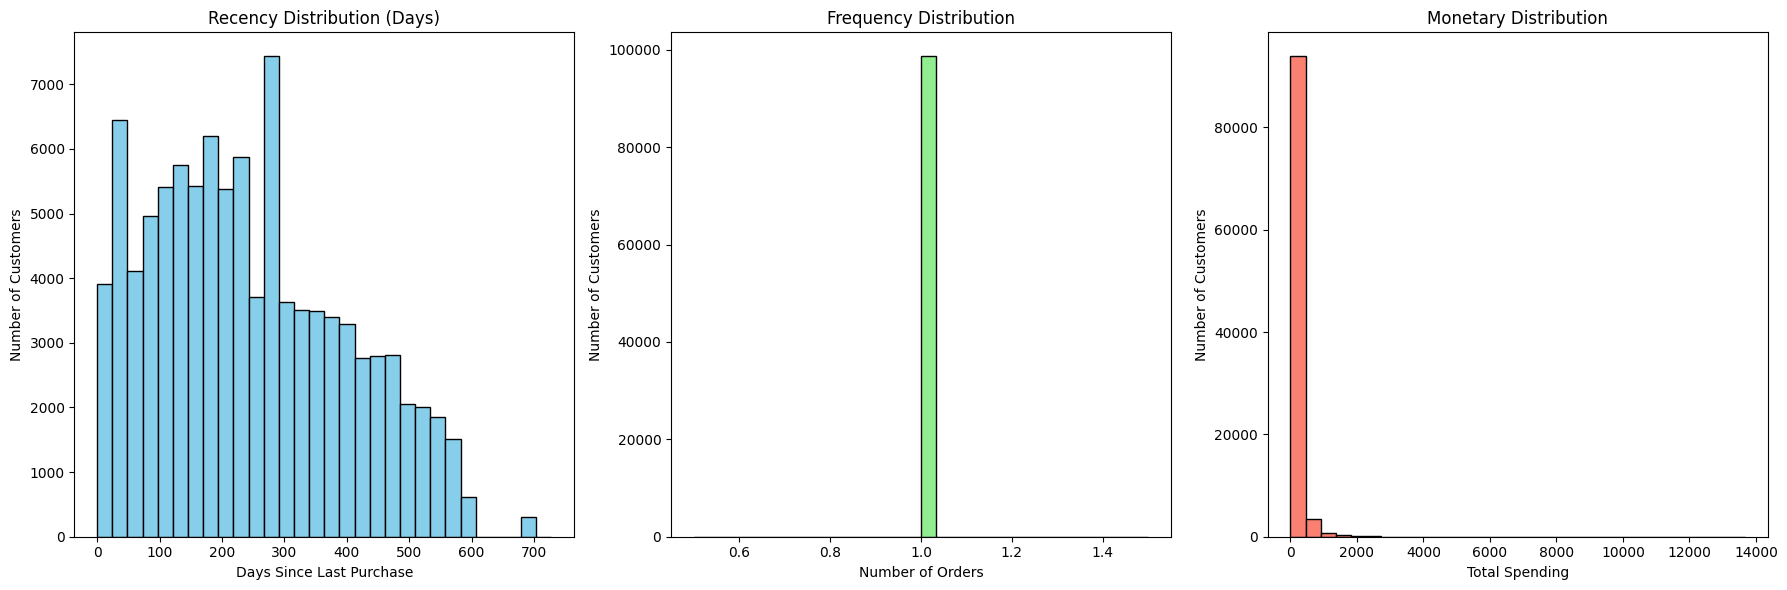

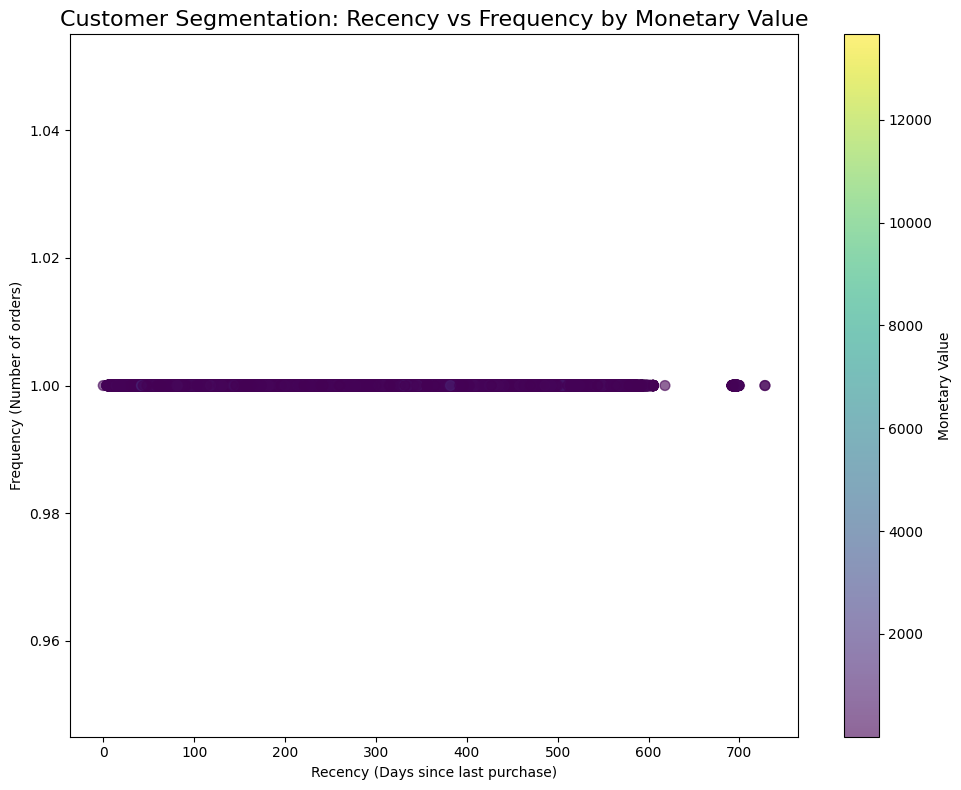

In [72]:
# Create RFM (Recency, Frequency, Monetary) features for customer segmentation
def create_rfm_features(df):
    if not pd.api.types.is_datetime64_dtype(df['order_purchase_date']):
        df['order_purchase_date'] = pd.to_datetime(df['order_purchase_date'])
    max_date = df['order_purchase_date'].max()

    # Aggregate with unique names
    customer_features = df.groupby('customer_id').agg(
        recency_days = ('order_purchase_date', lambda x: (max_date - x.max()).days),
        frequency = ('order_id', 'nunique'),
        monetary_total = ('payment_value', 'sum'),
        avg_order_value = ('price', 'mean'),
        total_spent_products = ('price', 'sum'),
        total_shipping_cost = ('freight_value', 'sum'),
        category_diversity = ('product_category_name_english', 'nunique'),
        unique_sellers = ('seller_id', 'nunique'),
        avg_installments = ('payment_installments', 'mean'),
        preferred_payment = ('payment_type', lambda x: x.mode()[0] if not x.mode().empty else None),
        customer_lifetime_days = ('order_purchase_date', lambda x: (x.max() - x.min()).days if len(x) > 1 else 0)
    ).reset_index()

    # ...rest of your code unchanged...
    # Add the average time between orders (in days)
    purchase_dates = df.groupby(['customer_id', 'order_id'])['order_purchase_date'].max().reset_index()
    purchase_dates = purchase_dates.sort_values(['customer_id', 'order_purchase_date'])
    time_diffs = purchase_dates.groupby('customer_id').apply(
        lambda x: pd.Series(
            [0] + [(x['order_purchase_date'].iloc[i] - x['order_purchase_date'].iloc[i-1]).days 
                  for i in range(1, len(x))]
        ).mean() if len(x) > 1 else 0
    )
    customer_features['avg_days_between_orders'] = time_diffs.values

    customer_features['avg_product_to_shipping_ratio'] = (
        customer_features['total_spent_products'] / 
        customer_features['total_shipping_cost'].replace(0, 1)
    )
    customer_features['purchase_frequency_monthly'] = (
        customer_features['frequency'] / 
        ((customer_features['customer_lifetime_days'] + 1) / 30)
    )
    customer_features['monetary_per_order'] = (
        customer_features['monetary_total'] / 
        customer_features['frequency']
    )
    return customer_features

# Create customer-centric features
customer_rfm = create_rfm_features(df)

# Display basic statistics about the customer features
print(customer_rfm.describe())

# Visualize RFM distributions
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(customer_rfm['recency_days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Recency Distribution (Days)')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
plt.hist(customer_rfm['frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 3)
plt.hist(customer_rfm['monetary_total'], bins=30, color='salmon', edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

# Scatter plot of Recency vs Frequency colored by Monetary value
plt.figure(figsize=(10, 8))
plt.scatter(
    customer_rfm['recency_days'], 
    customer_rfm['frequency'],
    c=customer_rfm['monetary_total'], 
    cmap='viridis',
    alpha=0.6,
    s=50
)
plt.colorbar(label='Monetary Value')
plt.title('Customer Segmentation: Recency vs Frequency by Monetary Value', size=16)
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Number of orders)')
plt.tight_layout()
plt.show()

### Statistical Analysis

In [73]:
# Statistical analysis of key metrics
def perform_statistical_analysis(df, customer_df):
    # Order-level statistics
    order_stats = {
        'Order Value': df['price'].describe(),
        'Shipping Cost': df['freight_value'].describe(),
        'Payment Value': df['payment_value'].describe(),
        'Payment Installments': df['payment_installments'].describe()
    }
    
    # Print order-level statistics
    print("ORDER-LEVEL STATISTICS:")
    for metric, stats in order_stats.items():
        print(f"\n{metric}:")
        print(stats)
    
    # Customer-level statistics
    customer_stats = {
        'Recency (days)': customer_df['recency_days'].describe(),
        'Frequency (orders)': customer_df['frequency'].describe(),
        'Monetary (total)': customer_df['monetary_total'].describe(),
        'Average Order Value': customer_df['avg_order_value'].describe(),
        'Product Category Diversity': customer_df['category_diversity'].describe(),
        'Purchase Frequency Monthly': customer_df['purchase_frequency_monthly'].describe()
    }
    
    # Print customer-level statistics
    print("\n\nCUSTOMER-LEVEL STATISTICS:")
    for metric, stats in customer_stats.items():
        print(f"\n{metric}:")
        print(stats)
    
    # Calculate statistical significance between high and low value customers
    print("\n\nSTATISTICAL COMPARISON OF HIGH VS LOW VALUE CUSTOMERS:")
    
    # Split customers into high value (top 20%) and low value (bottom 20%) based on monetary value
    high_value_threshold = customer_df['monetary_total'].quantile(0.8)
    low_value_threshold = customer_df['monetary_total'].quantile(0.2)
    
    high_value_customers = customer_df[customer_df['monetary_total'] >= high_value_threshold]
    low_value_customers = customer_df[customer_df['monetary_total'] <= low_value_threshold]
    
    # Compare metrics
    comparison_metrics = [
        'recency_days', 'frequency', 'avg_order_value', 
        'category_diversity', 'avg_installments', 'purchase_frequency_monthly'
    ]
    
    for metric in comparison_metrics:
        high_values = high_value_customers[metric]
        low_values = low_value_customers[metric]
        
        print(f"\nMetric: {metric}")
        print(f"High Value Customers (n={len(high_values)}):")
        print(f"  Mean: {high_values.mean():.2f}")
        print(f"  Median: {high_values.median():.2f}")
        print(f"Low Value Customers (n={len(low_values)}):")
        print(f"  Mean: {low_values.mean():.2f}")
        print(f"  Median: {low_values.median():.2f}")
        
        # Calculate effect size (Cohen's d)
        pooled_std = np.sqrt((high_values.std()**2 + low_values.std()**2) / 2)
        effect_size = (high_values.mean() - low_values.mean()) / pooled_std
        print(f"  Effect Size (Cohen's d): {effect_size:.2f}")
        
        # Interpretation of effect size
        if abs(effect_size) < 0.2:
            effect = "negligible"
        elif abs(effect_size) < 0.5:
            effect = "small"
        elif abs(effect_size) < 0.8:
            effect = "medium"
        else:
            effect = "large"
        
        print(f"  Interpretation: {effect.capitalize()} effect")
    
    return order_stats, customer_stats

# Perform statistical analysis
order_stats, customer_stats = perform_statistical_analysis(df, customer_rfm)

ORDER-LEVEL STATISTICS:

Order Value:
count    98665.000000
mean       125.965148
std        191.375902
min          0.850000
25%         41.500000
50%         79.000000
75%        139.900000
max       6735.000000
Name: price, dtype: float64

Shipping Cost:
count    98665.000000
mean        20.202103
std         15.909857
min          0.000000
25%         13.310000
50%         16.360000
75%         21.230000
max        409.680000
Name: freight_value, dtype: float64

Payment Value:
count    98665.000000
mean       157.959931
std        218.029937
min          0.010000
25%         60.010000
50%        103.330000
75%        175.080000
max      13664.080000
Name: payment_value, dtype: float64

Payment Installments:
count    98665.000000
mean         2.917083
std          2.709189
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         24.000000
Name: payment_installments, dtype: float64


CUSTOMER-LEVEL STATISTICS:

Recency (days):
count    98665

C:\Users\anast\AppData\Local\Temp\ipykernel_31812\1668772544.py:63: RuntimeWarning: invalid value encountered in scalar divide
  effect_size = (high_values.mean() - low_values.mean()) / pooled_std
C:\Users\anast\AppData\Local\Temp\ipykernel_31812\1668772544.py:63: RuntimeWarning: invalid value encountered in scalar divide
  effect_size = (high_values.mean() - low_values.mean()) / pooled_std
C:\Users\anast\AppData\Local\Temp\ipykernel_31812\1668772544.py:63: RuntimeWarning: invalid value encountered in scalar divide
  effect_size = (high_values.mean() - low_values.mean()) / pooled_std


### Customer Behavior Patterns

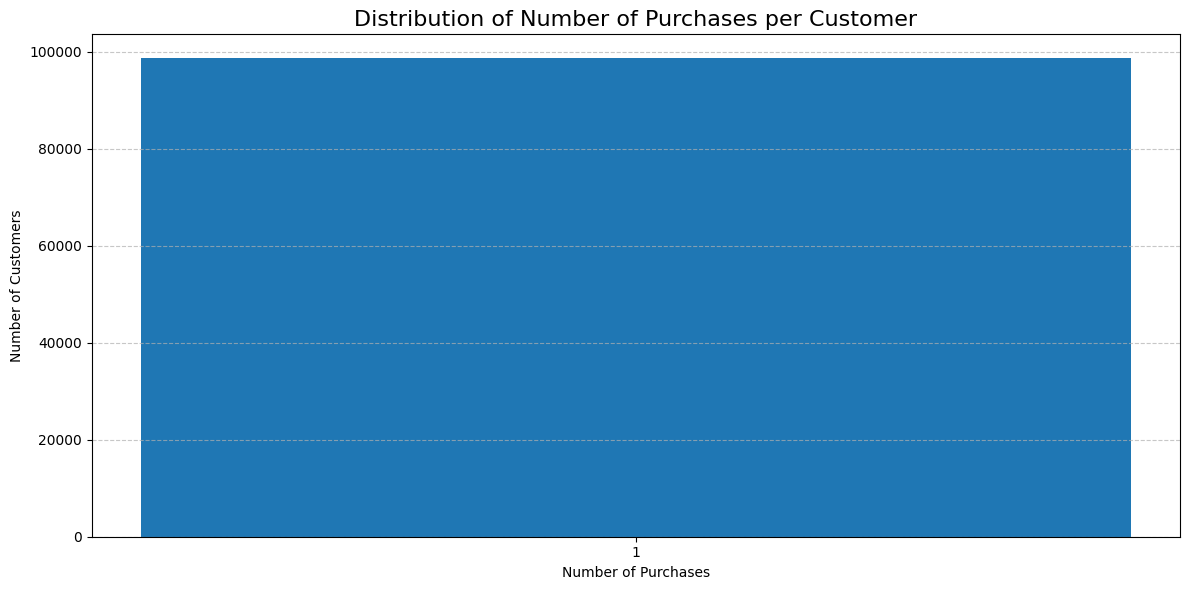

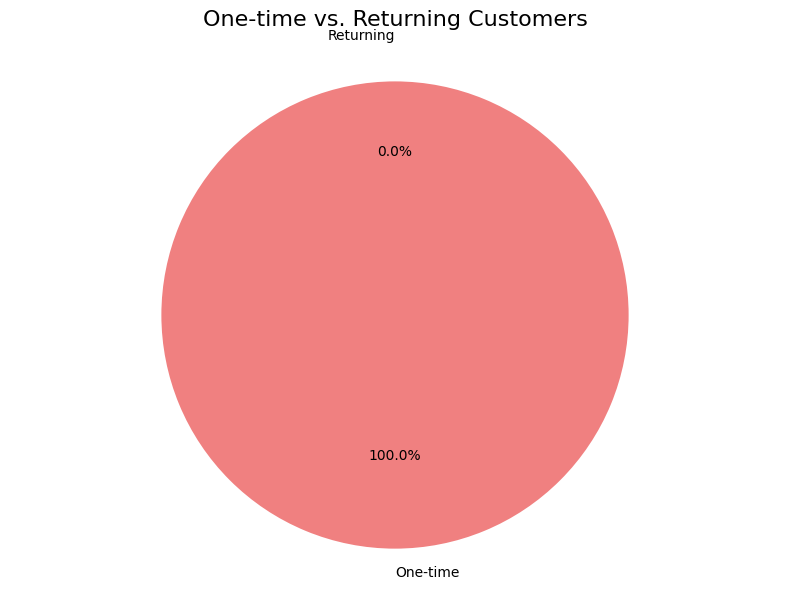

One-time customers: 98665 (100.0%)
Returning customers: 0 (0.0%)


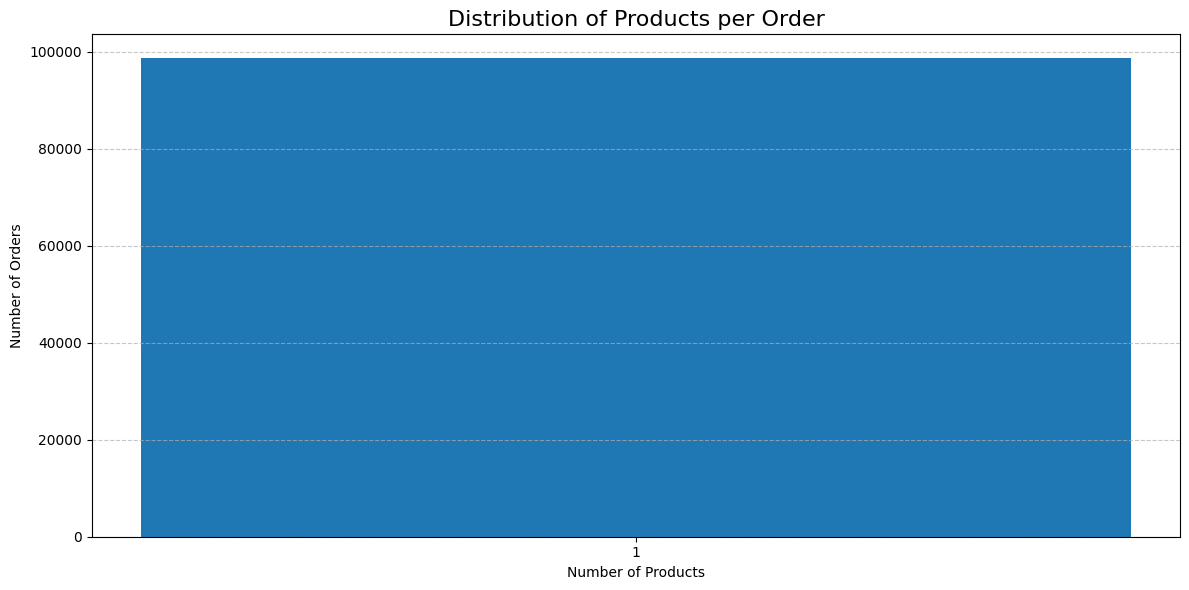

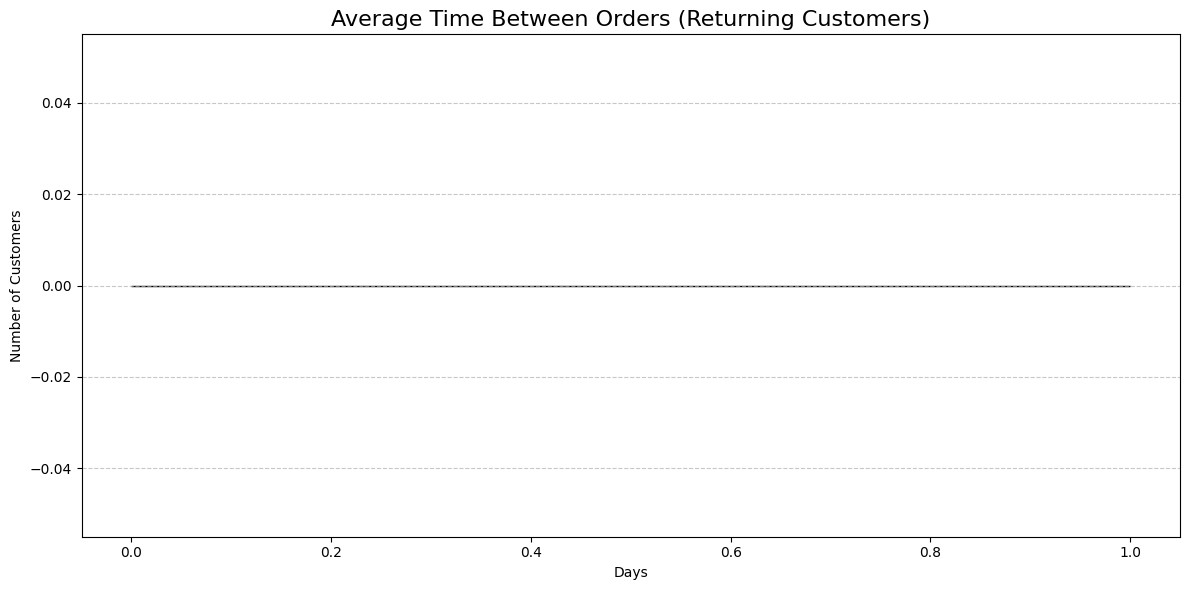

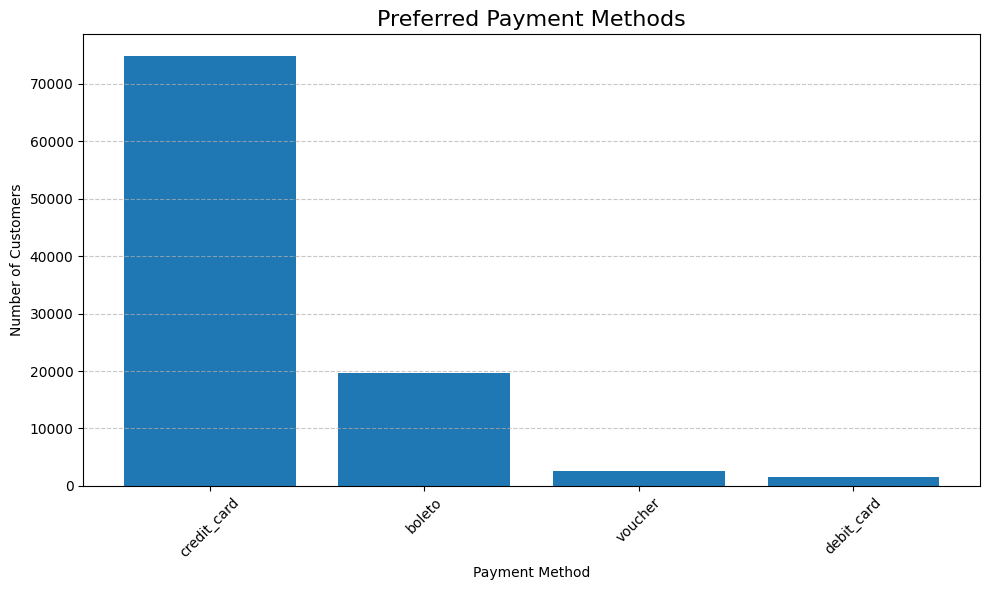

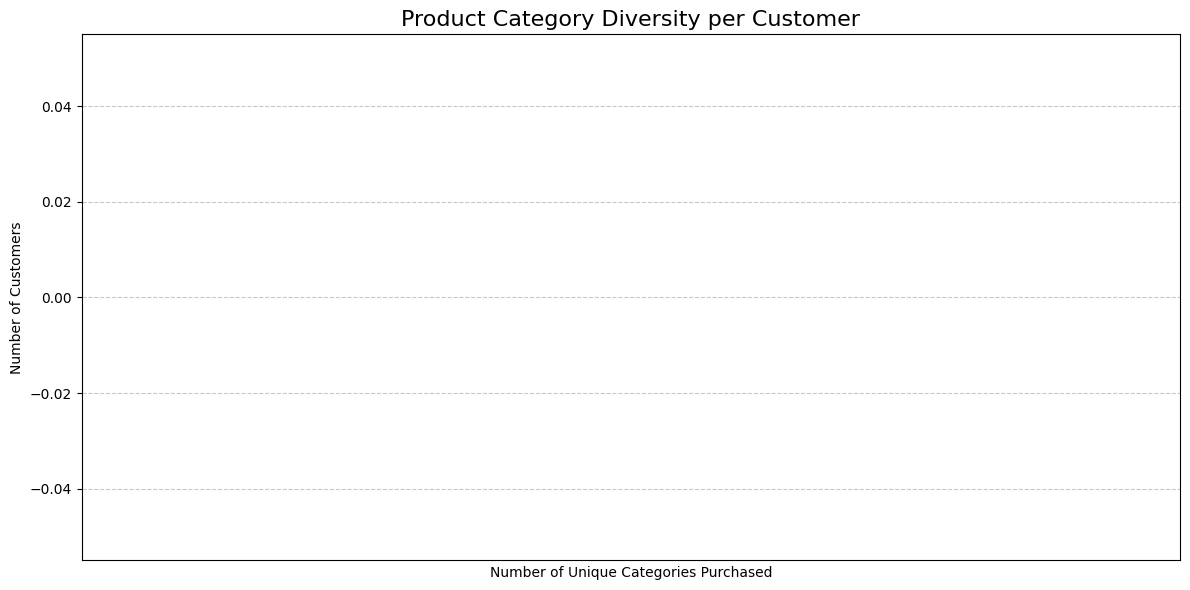

In [74]:
# Analyze customer behavior patterns
def analyze_customer_behavior(df, customer_df):
    # 1. Purchase frequency patterns
    plt.figure(figsize=(12, 6))
    purchase_counts = customer_df['frequency'].value_counts().sort_index()
    plt.bar(purchase_counts.index, purchase_counts.values)
    plt.title('Distribution of Number of Purchases per Customer', size=16)
    plt.xlabel('Number of Purchases')
    plt.ylabel('Number of Customers')
    plt.xticks(range(1, purchase_counts.index.max() + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # 2. One-time vs returning customers
    one_time = (customer_df['frequency'] == 1).sum()
    returning = (customer_df['frequency'] > 1).sum()
    
    plt.figure(figsize=(8, 6))
    plt.pie(
        [one_time, returning],
        labels=['One-time', 'Returning'],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'],
        startangle=90,
        explode=(0.1, 0)
    )
    plt.title('One-time vs. Returning Customers', size=16)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    print(f"One-time customers: {one_time} ({one_time/(one_time+returning)*100:.1f}%)")
    print(f"Returning customers: {returning} ({returning/(one_time+returning)*100:.1f}%)")
    
    # 3. Products per order distribution
    orders_with_products = df.groupby('order_id')['product_id'].count().reset_index()
    orders_with_products.columns = ['order_id', 'products_count']
    
    plt.figure(figsize=(12, 6))
    products_per_order = orders_with_products['products_count'].value_counts().sort_index()
    plt.bar(products_per_order.index, products_per_order.values)
    plt.title('Distribution of Products per Order', size=16)
    plt.xlabel('Number of Products')
    plt.ylabel('Number of Orders')
    plt.xticks(range(1, min(10, products_per_order.index.max() + 1)))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # 4. Time between purchases for returning customers
    time_between_orders = customer_df[customer_df['frequency'] > 1]['avg_days_between_orders']
    
    plt.figure(figsize=(12, 6))
    plt.hist(time_between_orders, bins=30, color='lightgreen', edgecolor='black')
    plt.title('Average Time Between Orders (Returning Customers)', size=16)
    plt.xlabel('Days')
    plt.ylabel('Number of Customers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # 5. Customer distribution by payment method
    payment_methods = customer_df['preferred_payment'].value_counts()
    
    plt.figure(figsize=(10, 6))
    plt.bar(payment_methods.index, payment_methods.values)
    plt.title('Preferred Payment Methods', size=16)
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # 6. Product category diversity
    plt.figure(figsize=(12, 6))
    plt.hist(customer_df['category_diversity'], bins=range(1, customer_df['category_diversity'].max() + 2), 
             color='skyblue', edgecolor='black')
    plt.title('Product Category Diversity per Customer', size=16)
    plt.xlabel('Number of Unique Categories Purchased')
    plt.ylabel('Number of Customers')
    plt.xticks(range(1, customer_df['category_diversity'].max() + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    return {
        'one_time_customers': one_time,
        'returning_customers': returning,
        'avg_time_between_orders': time_between_orders.mean(),
        'avg_products_per_order': orders_with_products['products_count'].mean()
    }

# Analyze customer behavior
behavior_metrics = analyze_customer_behavior(df, customer_rfm)

### Data Transformation

Order features with highest skewness:
                    Feature   Skewness
5        payment_sequential  32.564812
7             payment_value   9.311135
1                     price   7.748546
9                is_holiday   7.208057
2             freight_value   5.587568
6      payment_installments   1.609276
3    seller_zip_code_prefix   1.537475
8                is_weekend   1.282643
4  customer_zip_code_prefix   0.777981
0             order_item_id   0.000000

Customer features with highest skewness:
                          Feature    Skewness
11  avg_product_to_shipping_ratio  169.873318
2                  monetary_total    9.311135
13             monetary_per_order    9.311135
3                 avg_order_value    7.748546
4            total_spent_products    7.748546
5             total_shipping_cost    5.587568
8                avg_installments    1.609276
0                    recency_days    0.432550
1                       frequency    0.000000
6              category_diversi

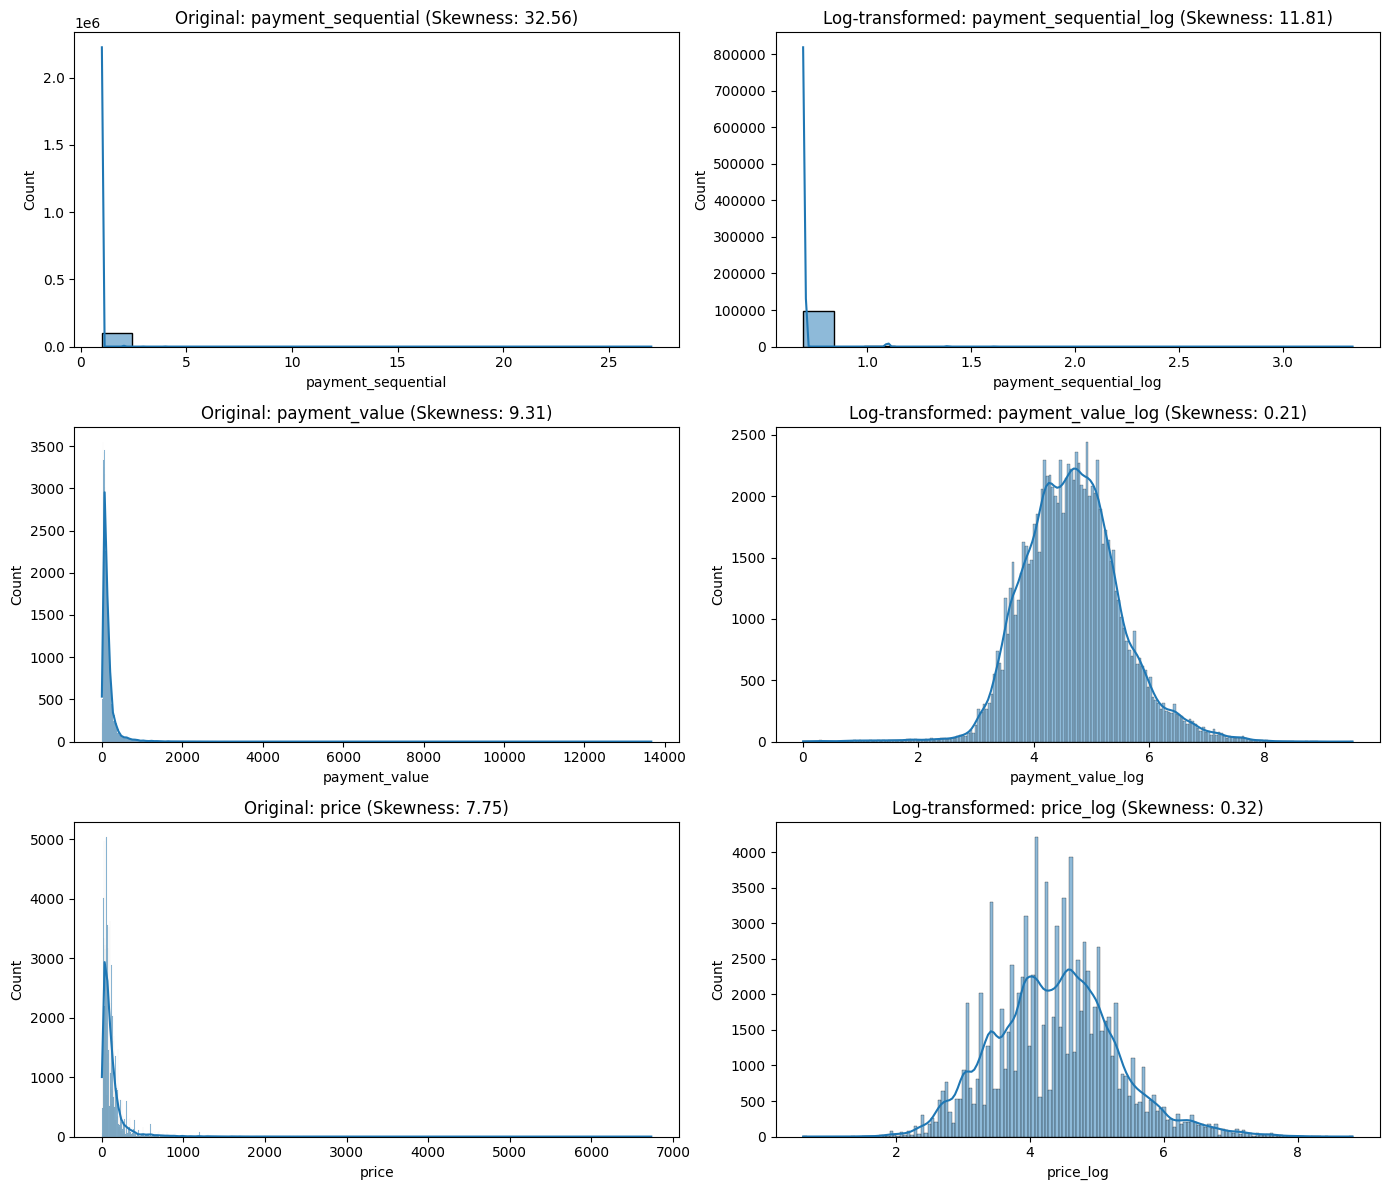

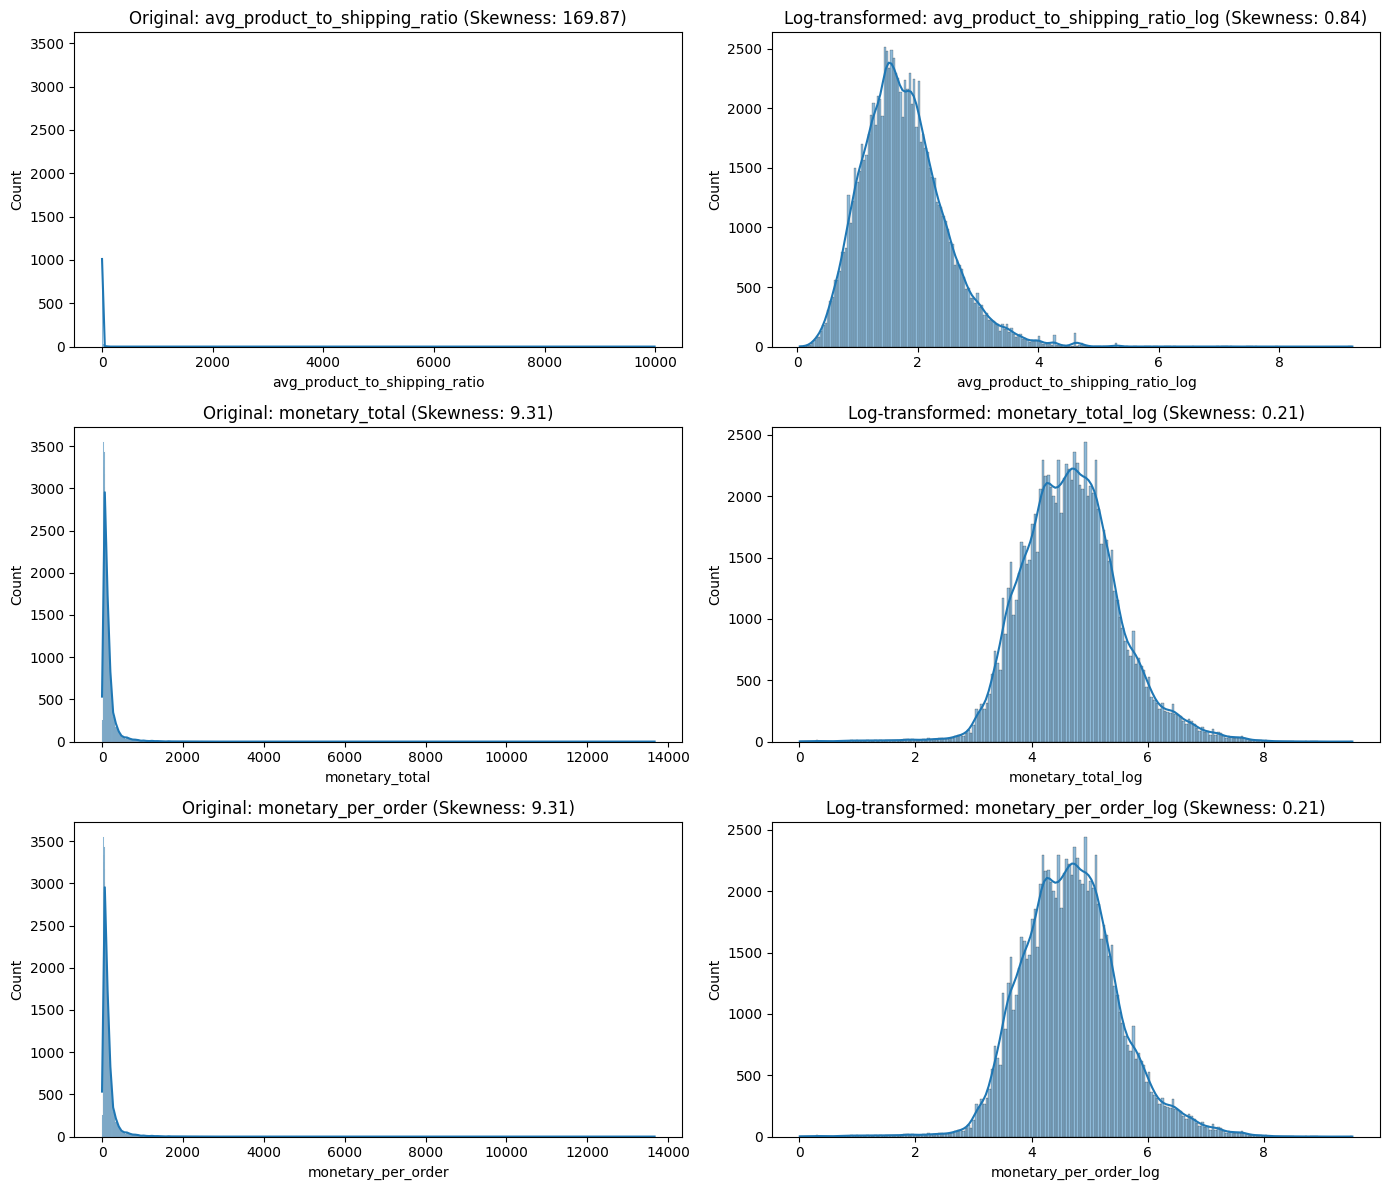

In [75]:
# Data transformation for skewed features
def transform_skewed_features(df, customer_df):
    # Identify numerical features in the order dataframe
    order_numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Identify numerical features in the customer dataframe
    customer_numeric_features = customer_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Calculate skewness for order features
    order_skewness = pd.DataFrame({
        'Feature': order_numeric_features,
        'Skewness': [df[col].skew() for col in order_numeric_features]
    }).sort_values('Skewness', ascending=False)
    
    # Calculate skewness for customer features
    customer_skewness = pd.DataFrame({
        'Feature': customer_numeric_features,
        'Skewness': [customer_df[col].skew() for col in customer_numeric_features]
    }).sort_values('Skewness', ascending=False)
    
    print("Order features with highest skewness:")
    print(order_skewness.head(10))
    
    print("\nCustomer features with highest skewness:")
    print(customer_skewness.head(10))
    
    # Identify highly skewed features (|skewness| > 1)
    highly_skewed_order = order_skewness[abs(order_skewness['Skewness']) > 1]['Feature'].tolist()
    highly_skewed_customer = customer_skewness[abs(customer_skewness['Skewness']) > 1]['Feature'].tolist()
    
    # Apply log transformation to highly skewed features
    df_transformed = df.copy()
    customer_df_transformed = customer_df.copy()
    
    for col in highly_skewed_order:
        # Only transform positive columns (log transformation requires positive values)
        if (df[col] > 0).all():
            df_transformed[f'{col}_log'] = np.log1p(df[col])  # log1p = log(1+x) to handle zeros
    
    for col in highly_skewed_customer:
        # Only transform positive columns
        if (customer_df[col] > 0).all():
            customer_df_transformed[f'{col}_log'] = np.log1p(customer_df[col])
    
    # Visualize before/after transformation for top 3 skewed features in each dataframe
    if len(highly_skewed_order) > 0:
        top_skewed_order = highly_skewed_order[:min(3, len(highly_skewed_order))]
        fig, axes = plt.subplots(len(top_skewed_order), 2, figsize=(14, 4 * len(top_skewed_order)))
        
        if len(top_skewed_order) == 1:
            axes = np.array([axes])  # Make it 2D for consistent indexing
        
        for i, feature in enumerate(top_skewed_order):
            # Original distribution
            sns.histplot(df[feature], ax=axes[i, 0], kde=True)
            axes[i, 0].set_title(f'Original: {feature} (Skewness: {df[feature].skew():.2f})')
            
            # Transformed distribution
            transformed_col = f'{feature}_log'
            sns.histplot(df_transformed[transformed_col], ax=axes[i, 1], kde=True)
            axes[i, 1].set_title(f'Log-transformed: {transformed_col} (Skewness: {df_transformed[transformed_col].skew():.2f})')
        
        plt.tight_layout()
        plt.show()
    
    if len(highly_skewed_customer) > 0:
        top_skewed_customer = highly_skewed_customer[:min(3, len(highly_skewed_customer))]
        fig, axes = plt.subplots(len(top_skewed_customer), 2, figsize=(14, 4 * len(top_skewed_customer)))
        
        if len(top_skewed_customer) == 1:
            axes = np.array([axes])  # Make it 2D for consistent indexing
        
        for i, feature in enumerate(top_skewed_customer):
            # Original distribution
            sns.histplot(customer_df[feature], ax=axes[i, 0], kde=True)
            axes[i, 0].set_title(f'Original: {feature} (Skewness: {customer_df[feature].skew():.2f})')
            
            # Transformed distribution
            transformed_col = f'{feature}_log'
            sns.histplot(customer_df_transformed[transformed_col], ax=axes[i, 1], kde=True)
            axes[i, 1].set_title(f'Log-transformed: {transformed_col} (Skewness: {customer_df_transformed[transformed_col].skew():.2f})')
        
        plt.tight_layout()
        plt.show()
    
    return df_transformed, customer_df_transformed

# Transform skewed features
df_transformed, customer_rfm_transformed = transform_skewed_features(df, customer_rfm)

### Correlation with Target Variables

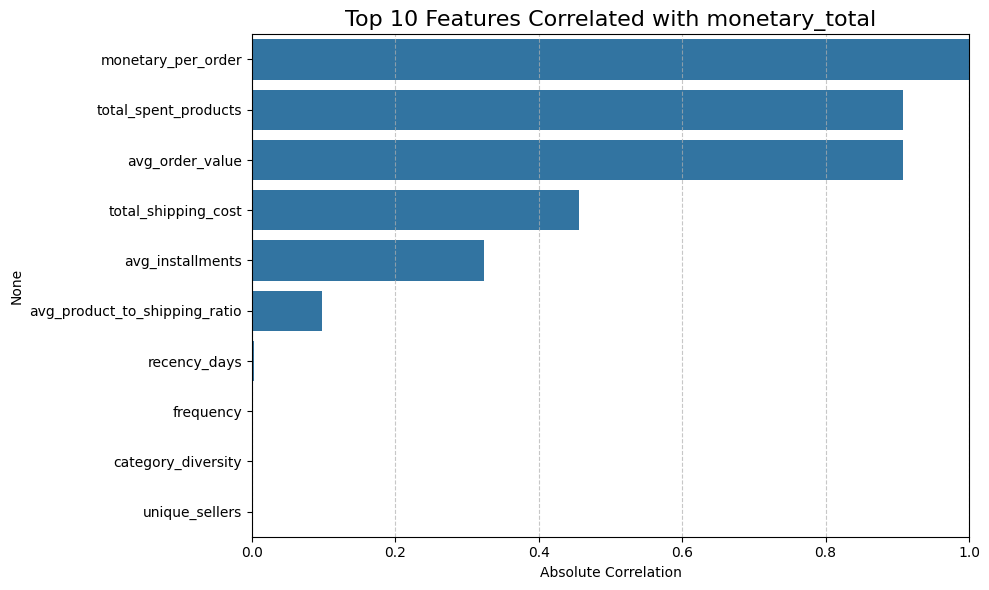

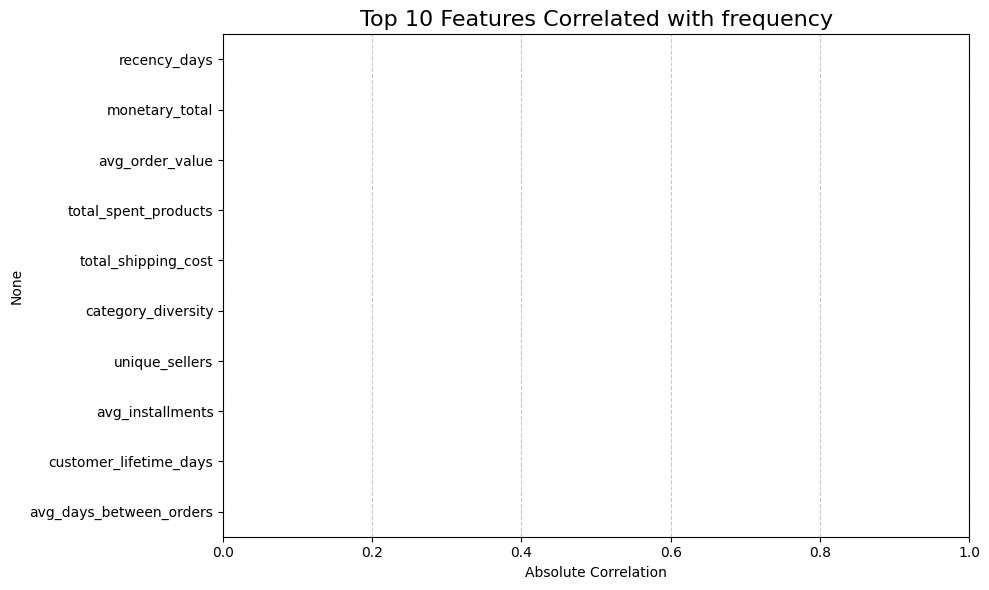

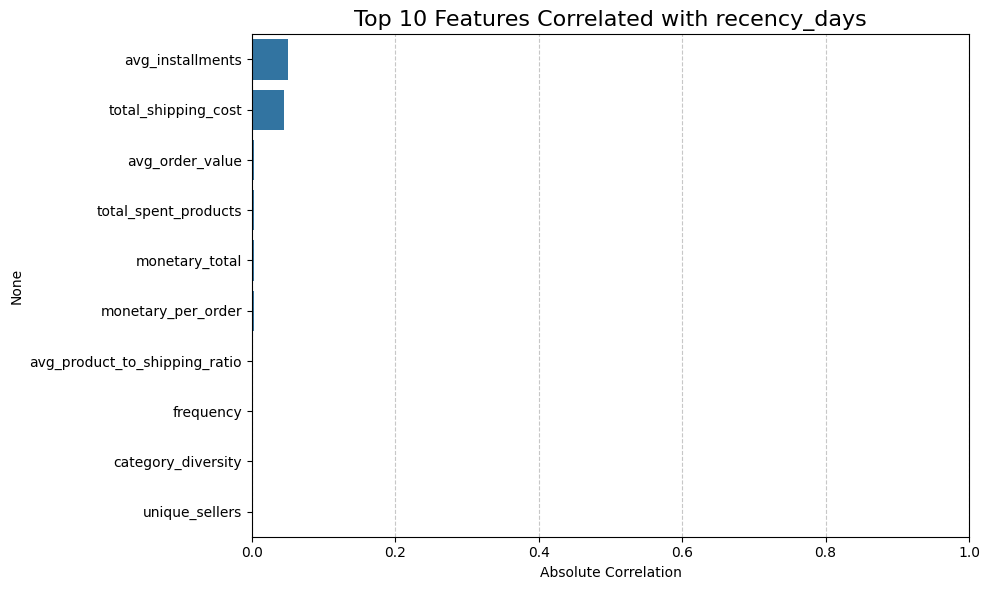

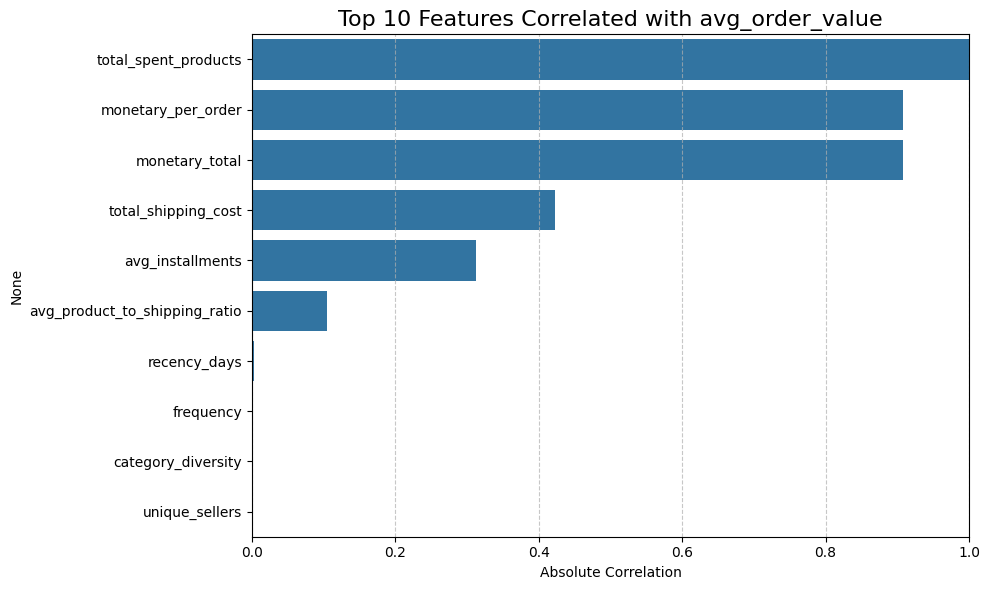

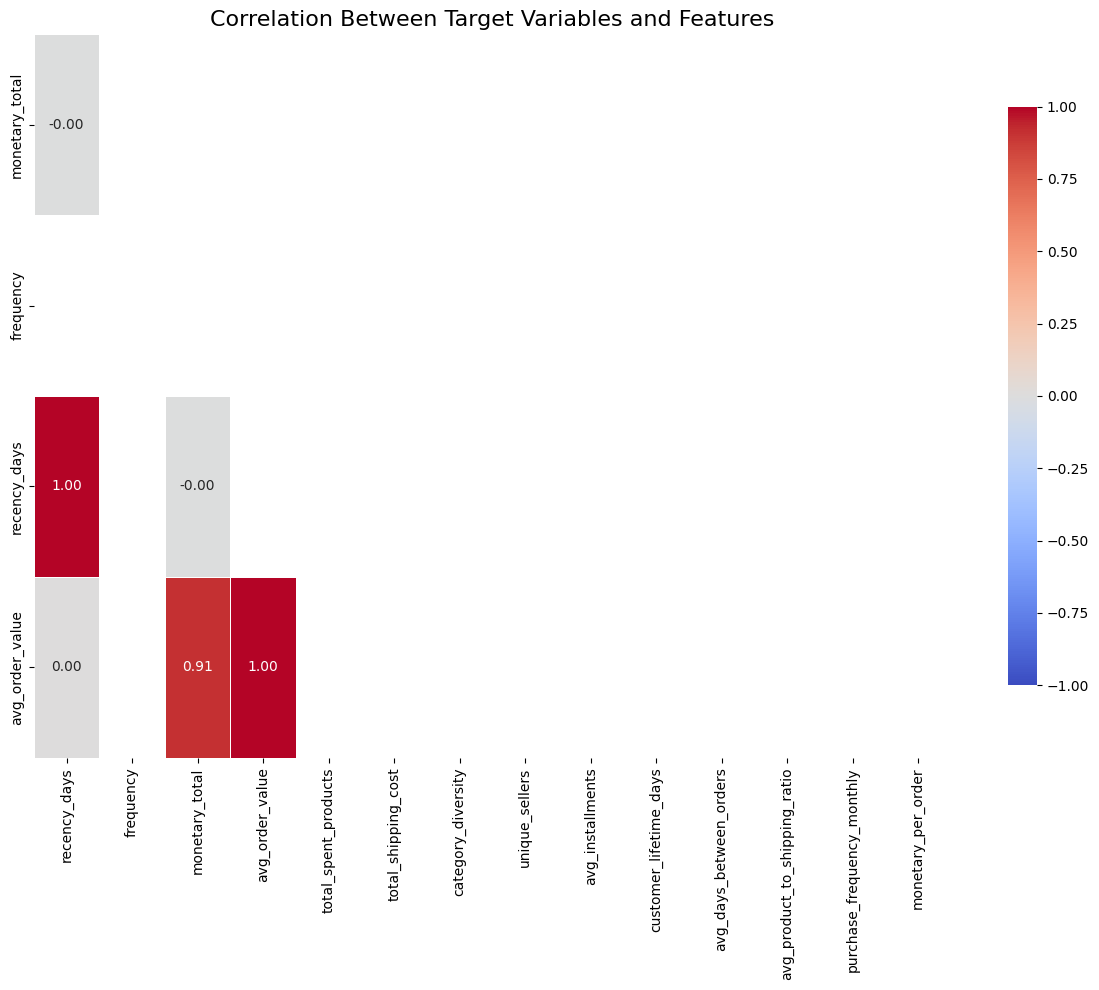

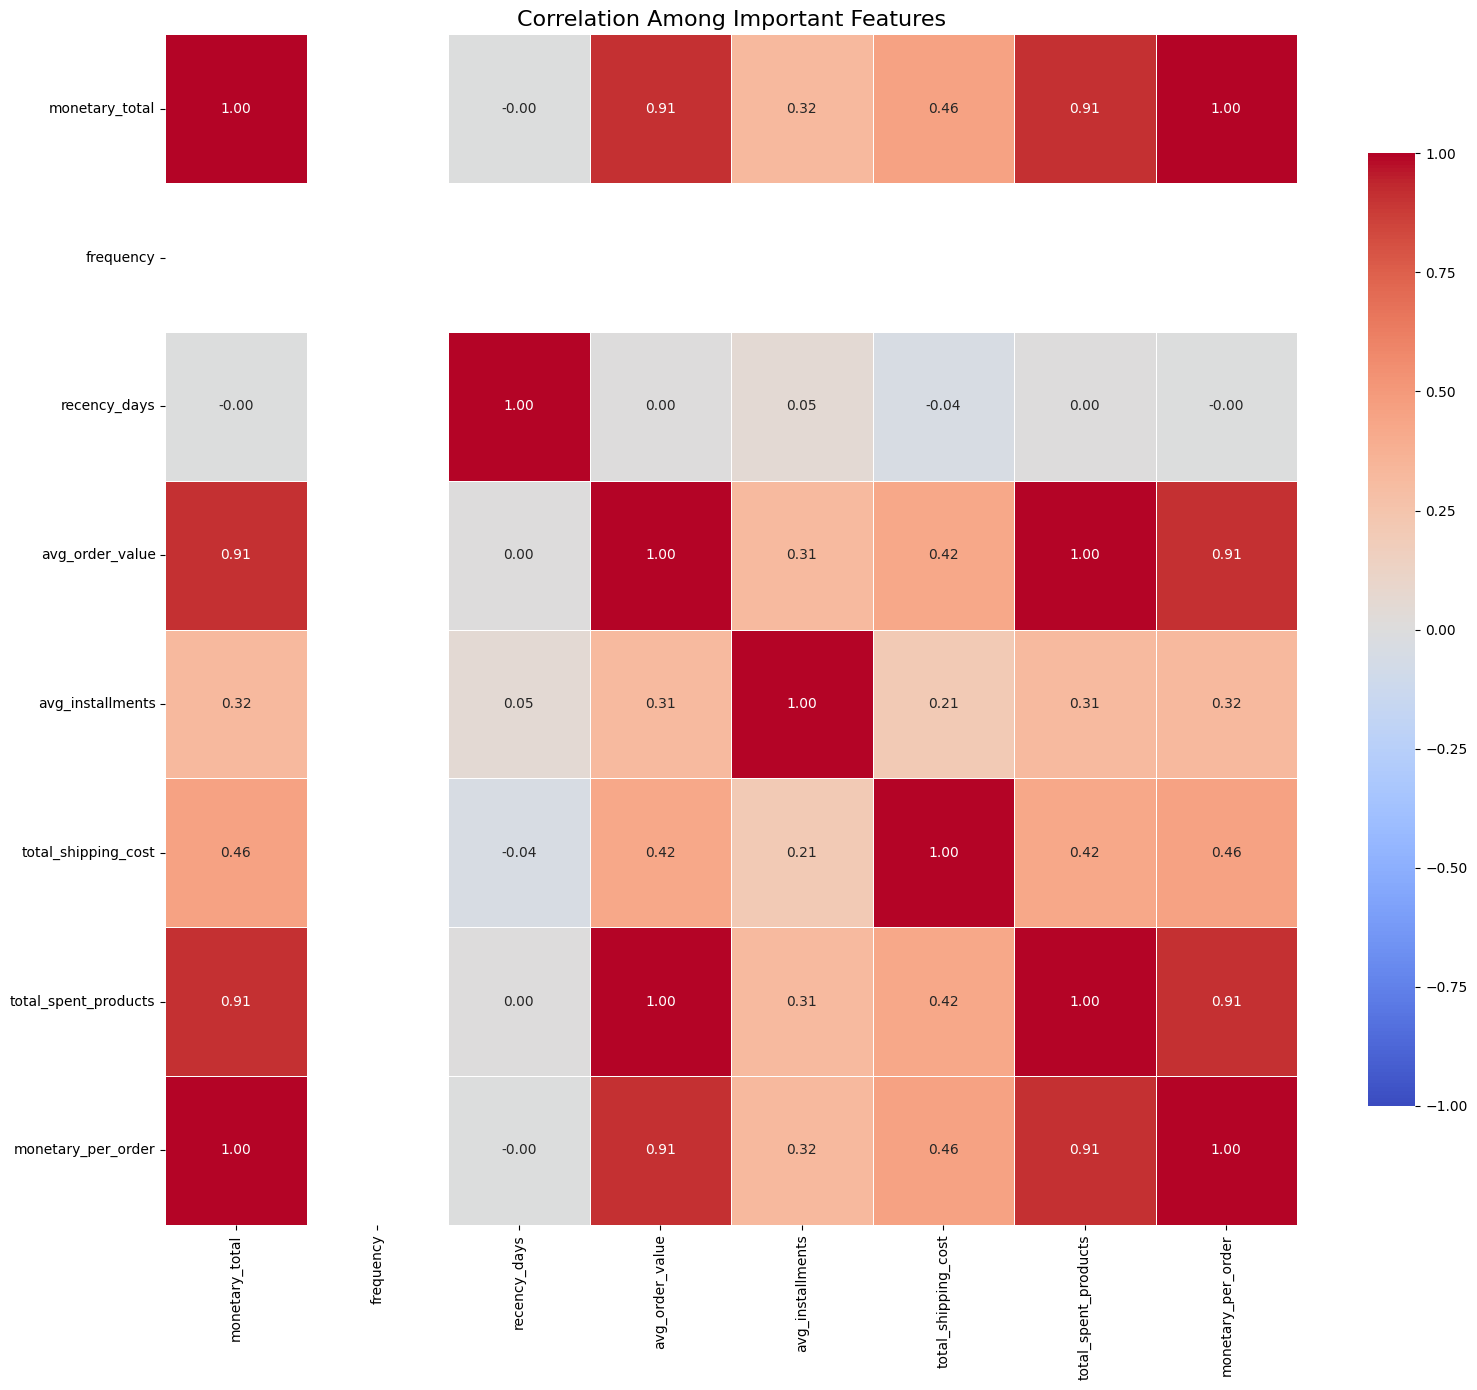

In [76]:
# Analyze correlations with potential segmentation targets
def analyze_correlations(customer_df):
    # Define potential target variables for segmentation
    target_variables = [
        'monetary_total',  # High vs. low value customers
        'frequency',       # Frequent vs. occasional shoppers
        'recency_days',    # Recent vs. inactive customers
        'avg_order_value'  # Big-ticket vs. small-ticket purchasers
    ]
    
    # Select numeric features
    numeric_cols = customer_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Calculate correlation matrix
    correlation_matrix = customer_df[numeric_cols].corr()
    
    # Create a DataFrame with correlations to target variables
    target_correlations = {target: correlation_matrix[target].abs().sort_values(ascending=False) 
                          for target in target_variables}
    
    # Plot correlation heatmap for each target
    for target in target_variables:
        # Get top 10 correlations (excluding self-correlation)
        top_correlations = target_correlations[target].drop(target).head(10)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_correlations.values, y=top_correlations.index)
        plt.title(f'Top 10 Features Correlated with {target}', size=16)
        plt.xlabel('Absolute Correlation')
        plt.xlim(0, 1)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    
    # Create a combined correlation heatmap for all target variables
    plt.figure(figsize=(12, 10))
    subset_corr = correlation_matrix.loc[target_variables, numeric_cols]
    mask = np.zeros_like(subset_corr, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = True  # Mask upper triangle
    
    sns.heatmap(
        subset_corr, 
        mask=mask,
        annot=True, 
        cmap='coolwarm', 
        vmin=-1, 
        vmax=1, 
        fmt='.2f',
        linewidths=0.5,
        cbar_kws={"shrink": .8}
    )
    plt.title('Correlation Between Target Variables and Features', size=16)
    plt.tight_layout()
    plt.show()
    
    # Find multicollinearity among features
    plt.figure(figsize=(16, 14))
    
    # Select a smaller subset of important features to avoid cluttered heatmap
    important_features = []
    for target in target_variables:
        important_features.extend(target_correlations[target].drop(target).head(5).index.tolist())
    
    # Remove duplicates and keep unique features
    important_features = list(set(important_features))
    
    # Add target variables as well
    important_features = target_variables + [f for f in important_features if f not in target_variables]
    
    # Create correlation heatmap for important features
    feature_corr = correlation_matrix.loc[important_features, important_features]
    
    sns.heatmap(
        feature_corr, 
        annot=True, 
        cmap='coolwarm', 
        vmin=-1, 
        vmax=1, 
        fmt='.2f',
        linewidths=0.5,
        cbar_kws={"shrink": .8}
    )
    plt.title('Correlation Among Important Features', size=16)
    plt.tight_layout()
    plt.show()
    
    return target_correlations, correlation_matrix

# Analyze correlations
target_correlations, correlation_matrix = analyze_correlations(customer_rfm)

### Feature Selection/Importance

Feature Importance Analysis:
--------------------------

Top 5 features for predicting monetary_total (Random Forest):
                         Feature  Importance
9             monetary_per_order    0.998255
1            total_shipping_cost    0.000712
7  avg_product_to_shipping_ratio    0.000555
0           total_spent_products    0.000459
4               avg_installments    0.000019


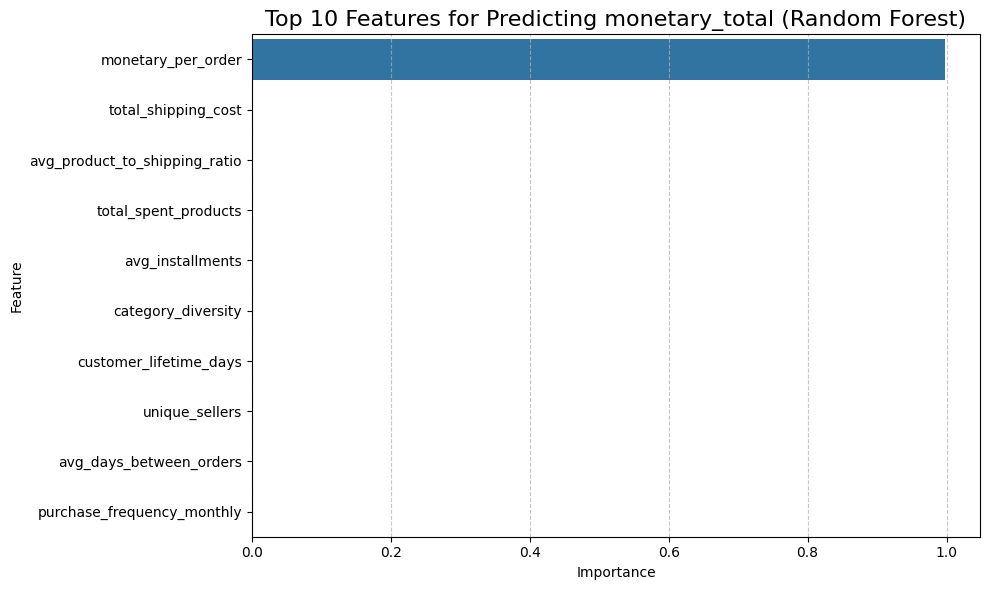


Top 5 features for predicting frequency (Random Forest):
                Feature  Importance
0  total_spent_products         0.0
1   total_shipping_cost         0.0
2    category_diversity         0.0
3        unique_sellers         0.0
4      avg_installments         0.0


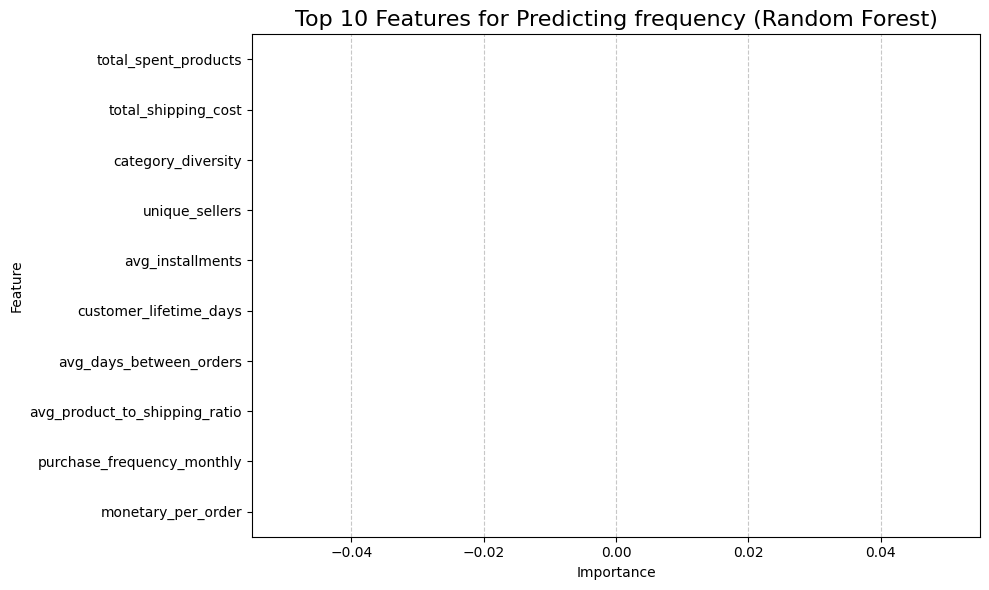


Top 5 features for predicting recency_days (Random Forest):
                         Feature  Importance
1            total_shipping_cost    0.466028
7  avg_product_to_shipping_ratio    0.228731
9             monetary_per_order    0.142204
0           total_spent_products    0.110157
4               avg_installments    0.052881


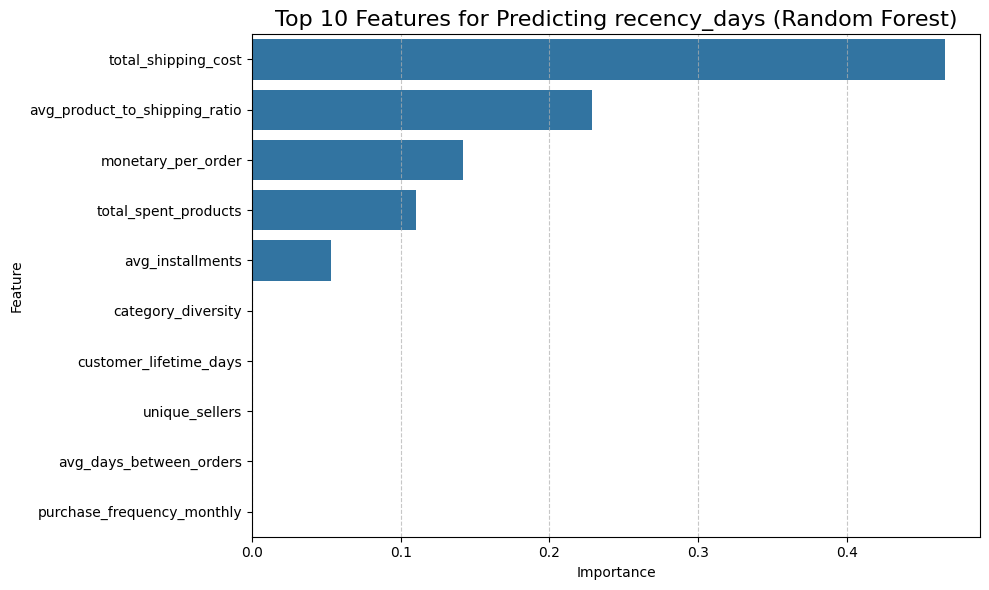


Top 5 features for predicting avg_order_value (Random Forest):
                         Feature  Importance
0           total_spent_products    0.996560
9             monetary_per_order    0.003210
1            total_shipping_cost    0.000164
4               avg_installments    0.000045
7  avg_product_to_shipping_ratio    0.000021


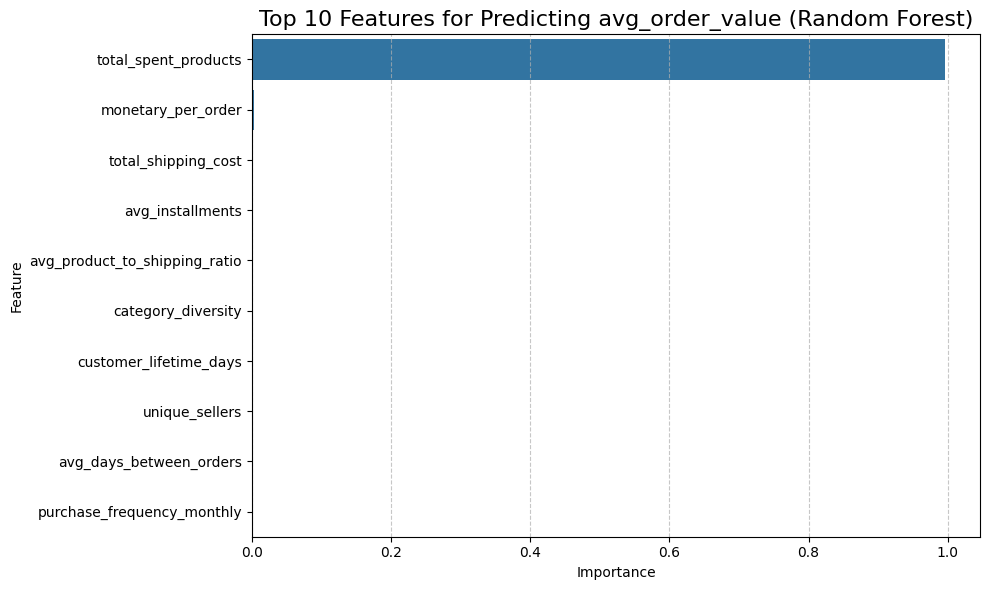


Top 5 features for predicting monetary_total (Mutual Information):
                         Feature  MI_Score
9             monetary_per_order  9.252976
7  avg_product_to_shipping_ratio  4.381012
0           total_spent_products  3.373062
1            total_shipping_cost  3.176503
4               avg_installments  0.223520


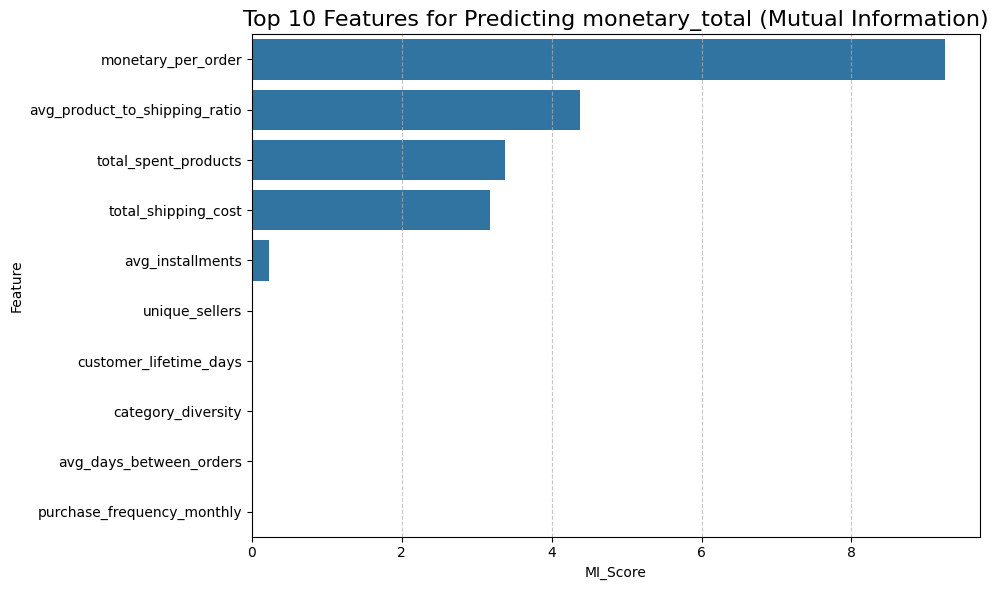


Top 5 features for predicting frequency (Mutual Information):
                         Feature  MI_Score
6        avg_days_between_orders  0.004050
3                 unique_sellers  0.002234
2             category_diversity  0.001559
4               avg_installments  0.001051
7  avg_product_to_shipping_ratio  0.001022


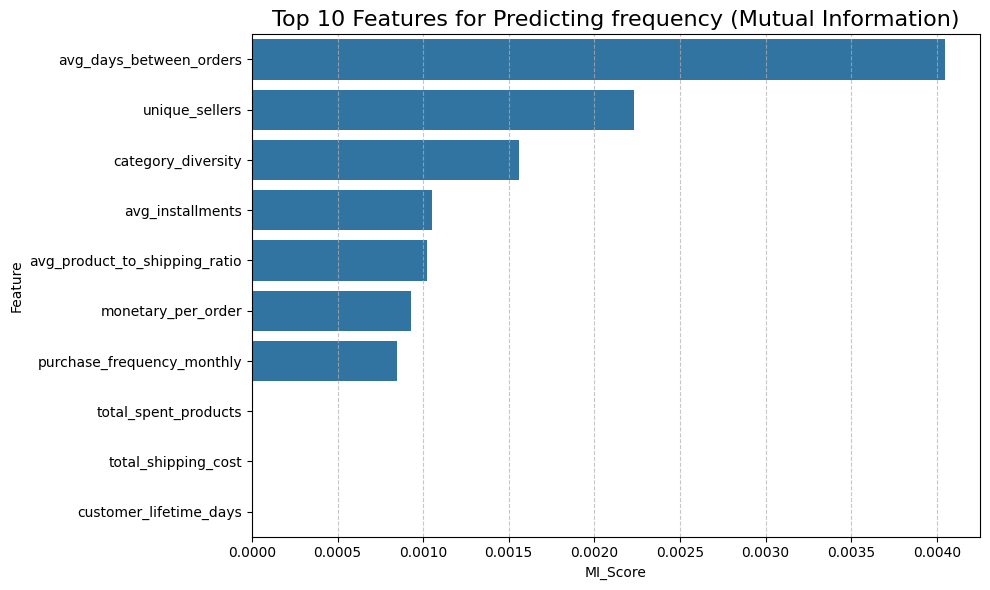


Top 5 features for predicting recency_days (Mutual Information):
                         Feature  MI_Score
1            total_shipping_cost  0.333144
0           total_spent_products  0.125761
7  avg_product_to_shipping_ratio  0.086144
9             monetary_per_order  0.066701
4               avg_installments  0.003362


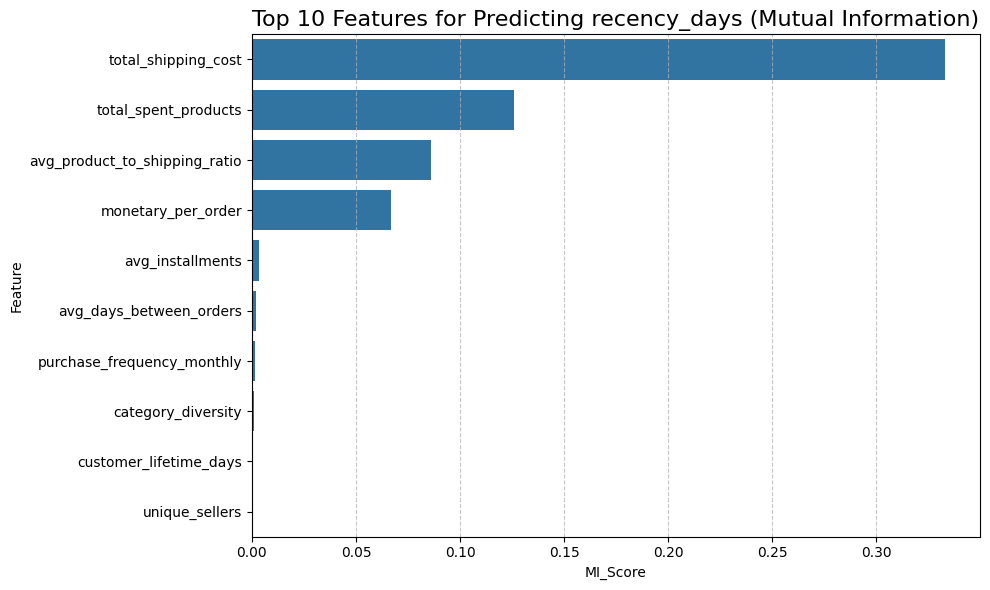


Top 5 features for predicting avg_order_value (Mutual Information):
                         Feature  MI_Score
0           total_spent_products  6.569849
9             monetary_per_order  3.374627
7  avg_product_to_shipping_ratio  3.231762
1            total_shipping_cost  1.917385
4               avg_installments  0.131975


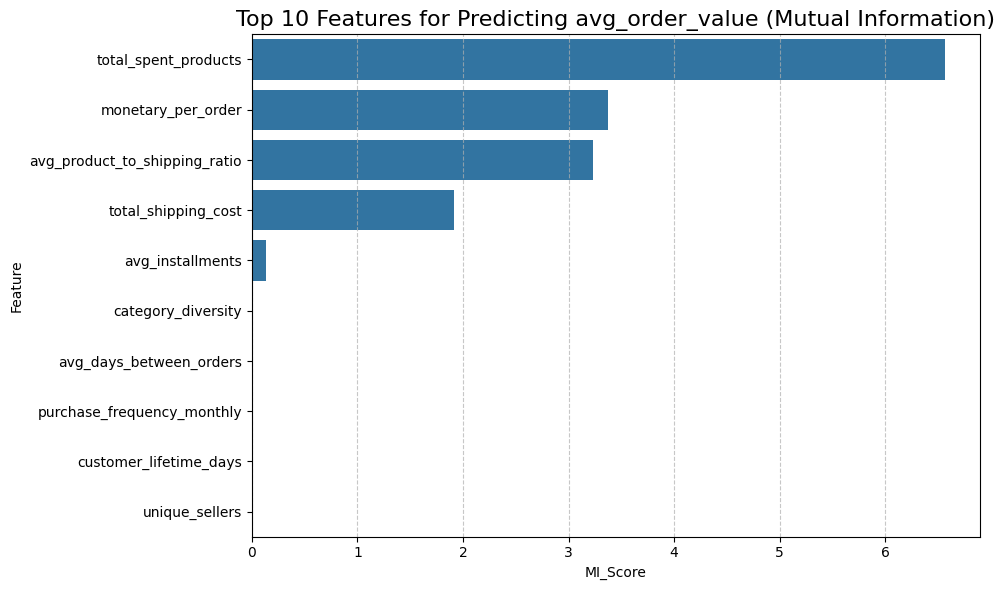

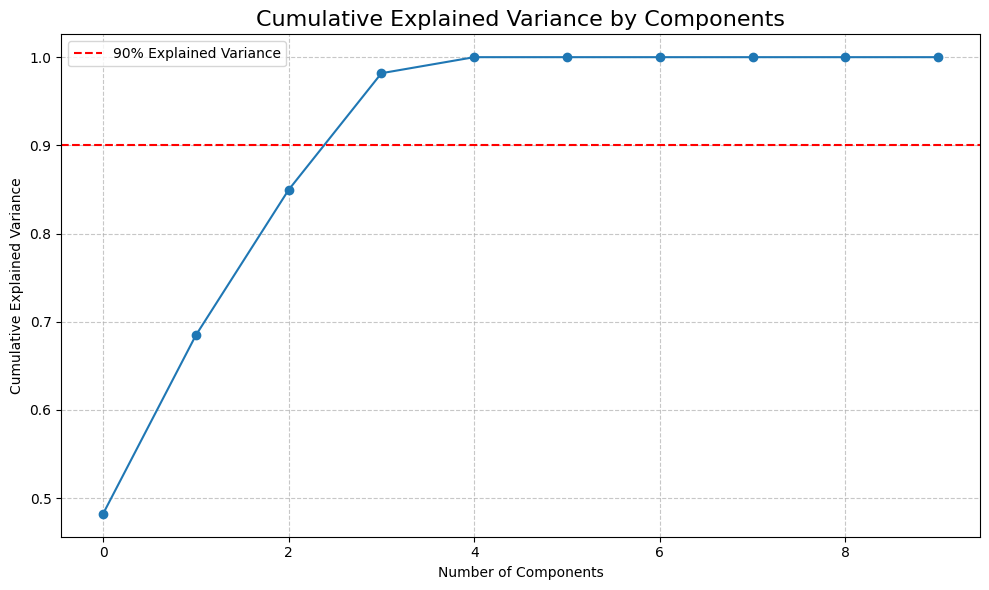


Number of PCA components needed to explain 90% of variance: 4

Principal Component Loadings (absolute values):
                                    PC1           PC2           PC3
Feature                                                            
monetary_per_order             0.597964  6.727670e-03  1.820942e-01
total_spent_products           0.590759  2.413140e-02  1.870897e-01
total_shipping_cost            0.417716  2.790065e-01  2.043353e-01
avg_installments               0.333022  3.660986e-02  9.392087e-01
avg_product_to_shipping_ratio  0.089730  9.592640e-01  8.929282e-02
category_diversity             0.000000  1.249001e-16  5.551115e-17
customer_lifetime_days         0.000000  0.000000e+00  0.000000e+00
unique_sellers                 0.000000  3.330669e-16  0.000000e+00
avg_days_between_orders        0.000000  0.000000e+00  0.000000e+00
purchase_frequency_monthly     0.000000  0.000000e+00  0.000000e+00


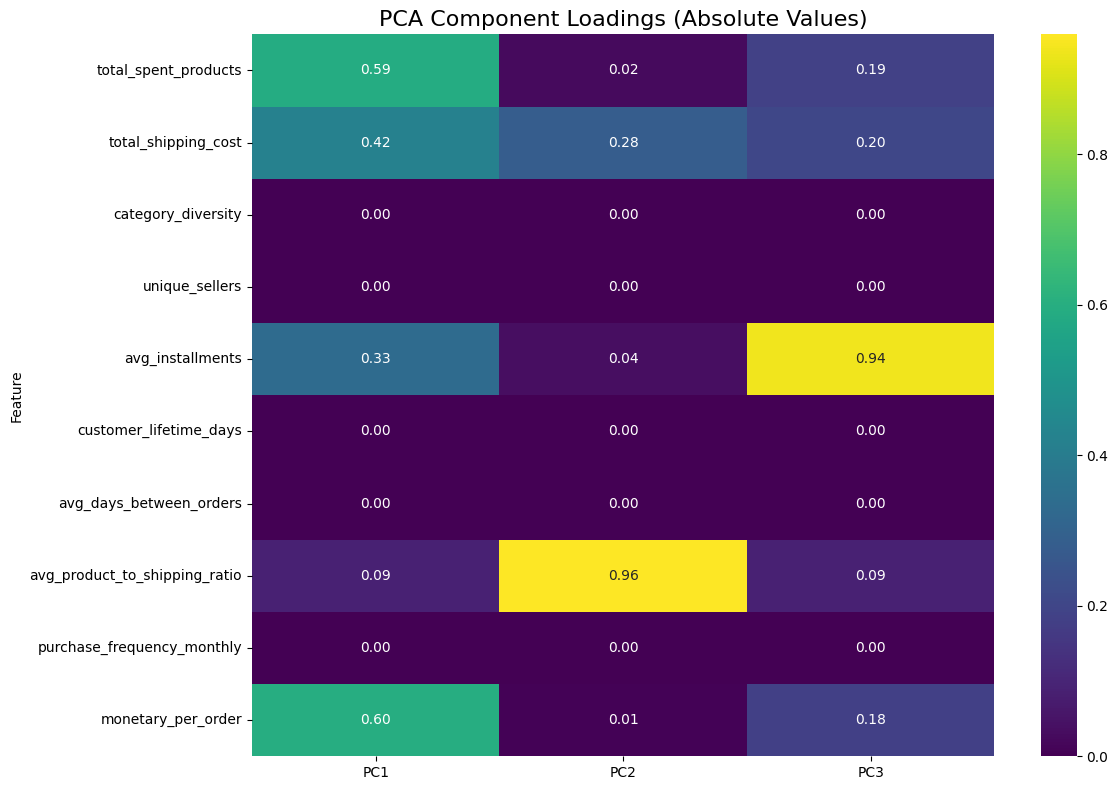


Top 10 features by composite importance score:
                         Feature  Composite_Score
0           total_spent_products              NaN
1            total_shipping_cost              NaN
2             category_diversity              NaN
3                 unique_sellers              NaN
4               avg_installments              NaN
5         customer_lifetime_days              NaN
6        avg_days_between_orders              NaN
7  avg_product_to_shipping_ratio              NaN
8     purchase_frequency_monthly              NaN
9             monetary_per_order              NaN


C:\Users\anast\AppData\Local\Temp\ipykernel_31812\4210876987.py:154: RuntimeWarning: invalid value encountered in scalar divide
  composite_scores[feature] += rf_score[0] / rf_max


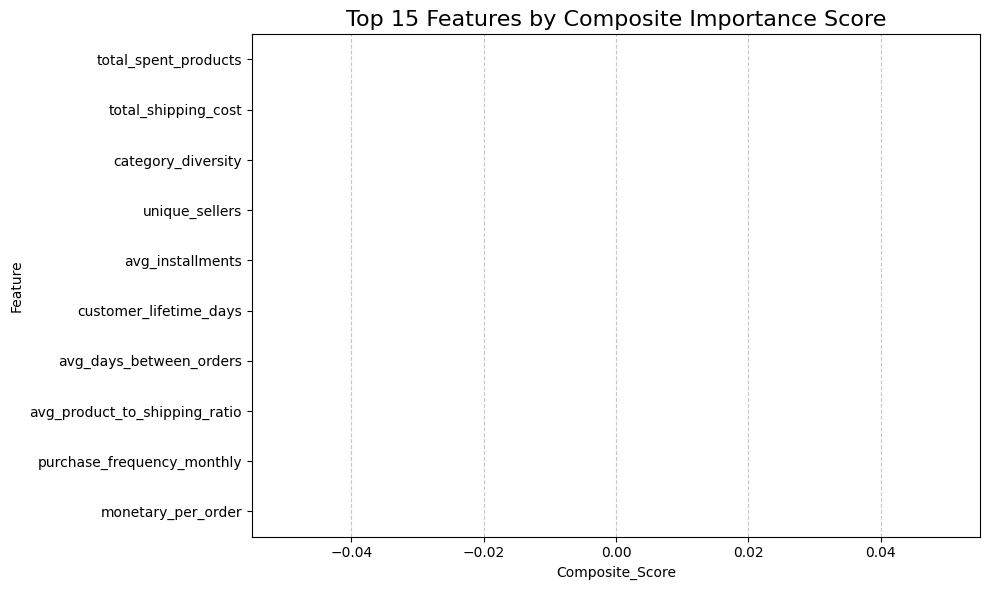


Recommended features for customer segmentation:
['total_spent_products', 'total_shipping_cost', 'category_diversity', 'unique_sellers', 'avg_installments', 'customer_lifetime_days', 'avg_days_between_orders', 'avg_product_to_shipping_ratio', 'purchase_frequency_monthly', 'monetary_per_order']


In [77]:
# Feature selection for customer segmentation
def select_important_features(customer_df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.feature_selection import mutual_info_regression
    
    # Remove non-numeric columns for analysis
    X = customer_df.select_dtypes(include=['float64', 'int64'])
    
    # Handle missing values if any
    X = X.fillna(X.median())
    
    # Define potential target variables
    target_variables = ['monetary_total', 'frequency', 'recency_days', 'avg_order_value']
    
    # Store results
    importance_results = {}
    
    print("Feature Importance Analysis:")
    print("--------------------------")
    
    # 1. Random Forest Feature Importance
    for target in target_variables:
        # Separate features and target
        y = X[target]
        X_features = X.drop(target_variables, axis=1)  # Drop all targets to avoid leakage
        
        # Scale features for better modeling
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_features)
        
        # Train Random Forest model
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_scaled, y)
        
        # Get feature importance
        feature_importance = pd.DataFrame({
            'Feature': X_features.columns,
            'Importance': rf.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        # Store results
        importance_results[f'{target}_rf'] = feature_importance
        
        # Print top 5 features
        print(f"\nTop 5 features for predicting {target} (Random Forest):")
        print(feature_importance.head(5))
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
        plt.title(f'Top 10 Features for Predicting {target} (Random Forest)', size=16)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    
    # 2. Mutual Information (for non-linear relationships)
    for target in target_variables:
        # Separate features and target
        y = X[target]
        X_features = X.drop(target_variables, axis=1)
        
        # Calculate mutual information
        mi_scores = mutual_info_regression(X_features, y, random_state=42)
        
        # Create DataFrame with results
        mi_importance = pd.DataFrame({
            'Feature': X_features.columns,
            'MI_Score': mi_scores
        }).sort_values('MI_Score', ascending=False)
        
        # Store results
        importance_results[f'{target}_mi'] = mi_importance
        
        # Print top 5 features
        print(f"\nTop 5 features for predicting {target} (Mutual Information):")
        print(mi_importance.head(5))
        
        # Plot mutual information scores
        plt.figure(figsize=(10, 6))
        sns.barplot(x='MI_Score', y='Feature', data=mi_importance.head(10))
        plt.title(f'Top 10 Features for Predicting {target} (Mutual Information)', size=16)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    
    # 3. Principal Component Analysis to identify important feature combinations
    X_for_pca = X.drop(target_variables, axis=1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_for_pca)
    
    # Apply PCA
    pca = PCA()
    pca.fit(X_scaled)
    
    # Plot explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
    plt.title('Cumulative Explained Variance by Components', size=16)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Get the number of components needed to explain 90% of variance
    n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
    print(f"\nNumber of PCA components needed to explain 90% of variance: {n_components}")
    
    # Look at feature weights for the first few principal components
    n_display = min(3, len(pca.components_))
    component_df = pd.DataFrame()
    
    for i in range(n_display):
        component_df[f'PC{i+1}'] = pca.components_[i]
    
    component_df['Feature'] = X_for_pca.columns
    component_df = component_df.set_index('Feature')
    
    # Display component loadings
    print("\nPrincipal Component Loadings (absolute values):")
    print(component_df.abs().sort_values(by='PC1', ascending=False).head(10))
    
    # Plot heatmap of component loadings
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        component_df.abs(), 
        cmap='viridis', 
        annot=True, 
        fmt='.2f'
    )
    plt.title('PCA Component Loadings (Absolute Values)', size=16)
    plt.tight_layout()
    plt.show()
    
    # 4. Create a composite feature importance score
    # Combine RF and MI scores for a more robust ranking
    composite_scores = {}
    
    for feature in X_for_pca.columns:
        composite_scores[feature] = 0
        
        # Add normalized scores from all methods
        for target in target_variables:
            # RF scores
            rf_max = importance_results[f'{target}_rf']['Importance'].max()
            rf_score = importance_results[f'{target}_rf'][
                importance_results[f'{target}_rf']['Feature'] == feature
            ]['Importance'].values
            if len(rf_score) > 0:
                composite_scores[feature] += rf_score[0] / rf_max
            
            # MI scores
            mi_max = importance_results[f'{target}_mi']['MI_Score'].max()
            mi_score = importance_results[f'{target}_mi'][
                importance_results[f'{target}_mi']['Feature'] == feature
            ]['MI_Score'].values
            if len(mi_score) > 0 and mi_max > 0:  # Avoid division by zero
                composite_scores[feature] += mi_score[0] / mi_max
    
    # Create DataFrame with composite scores
    composite_df = pd.DataFrame({
        'Feature': list(composite_scores.keys()),
        'Composite_Score': list(composite_scores.values())
    }).sort_values('Composite_Score', ascending=False)
    
    print("\nTop 10 features by composite importance score:")
    print(composite_df.head(10))
    
    # Plot composite scores
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Composite_Score', y='Feature', data=composite_df.head(15))
    plt.title('Top 15 Features by Composite Importance Score', size=16)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Return the recommended set of features for segmentation
    recommended_features = composite_df.head(10)['Feature'].tolist()
    print("\nRecommended features for customer segmentation:")
    print(recommended_features)
    
    return composite_df, recommended_features, importance_results

# Select important features
composite_importance, recommended_features, importance_details = select_important_features(customer_rfm)

### Customer Segmentation Preparation

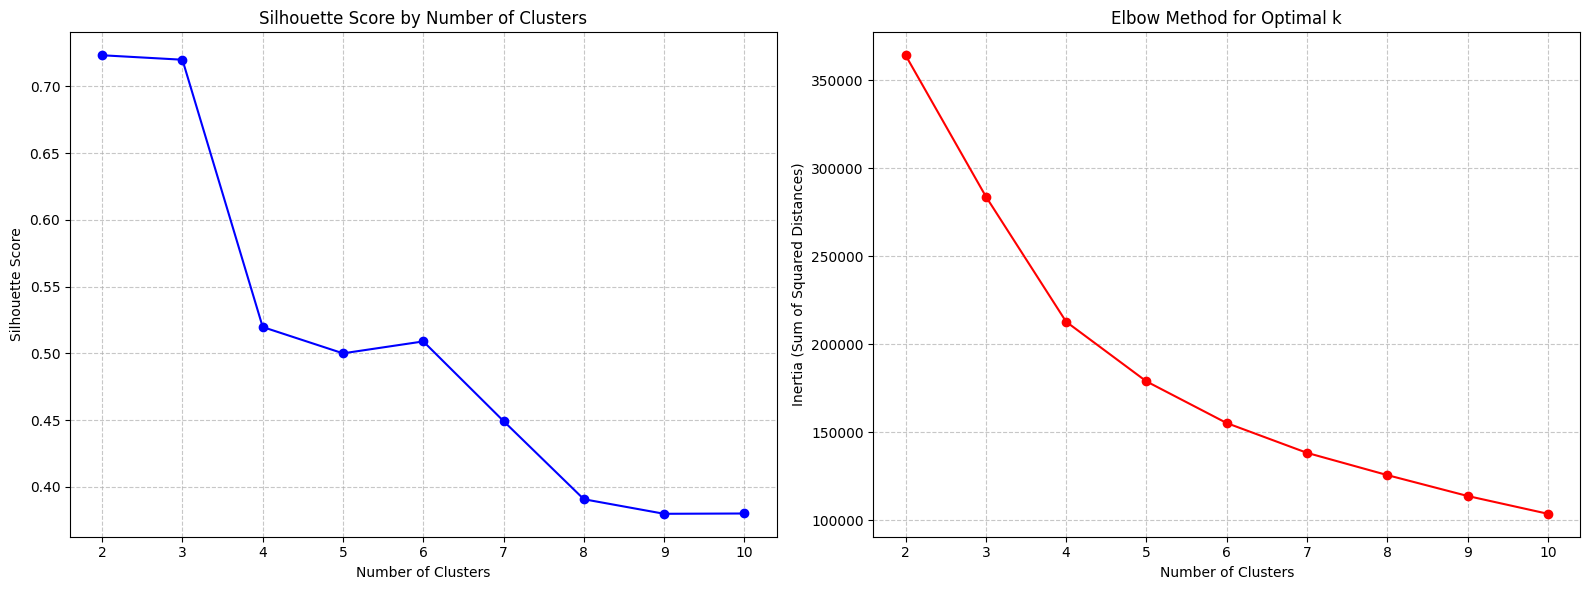

Optimal number of clusters based on silhouette score: 2


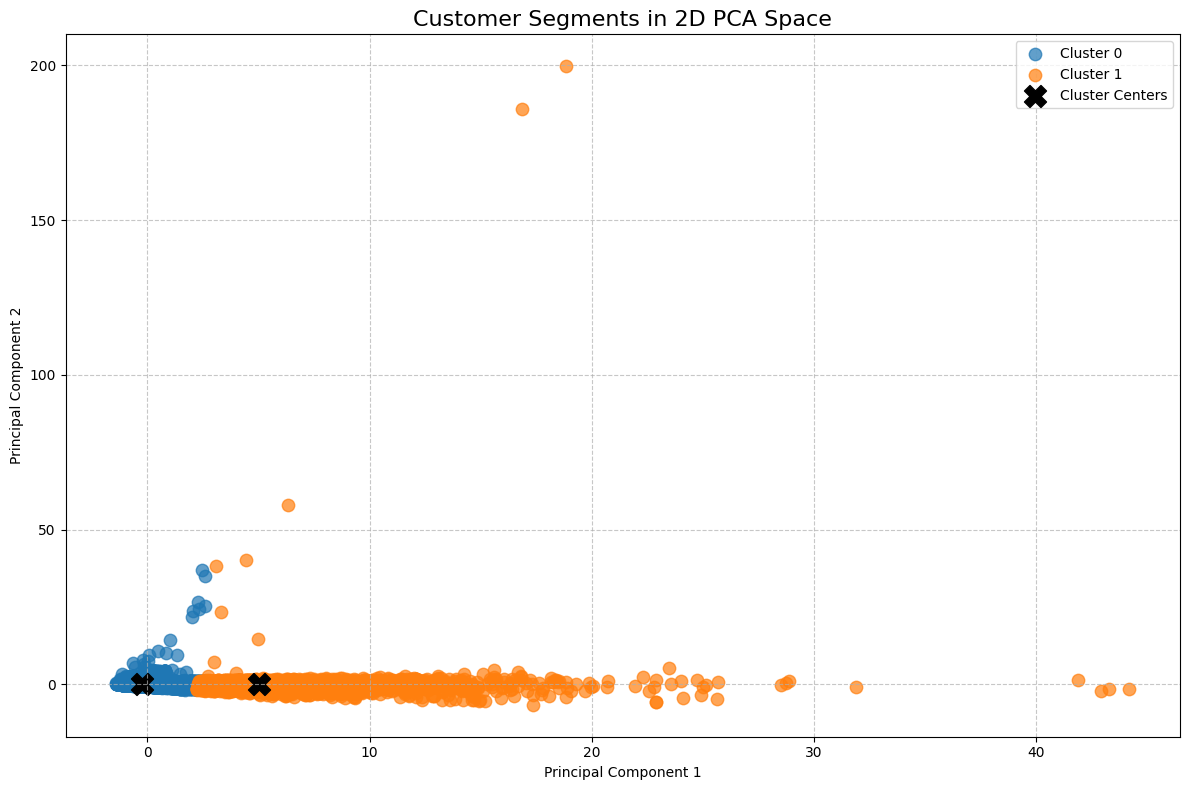


Cluster Profiles (normalized):
            total_spent_products  total_shipping_cost  category_diversity  \
ML_Cluster                                                                  
0                            0.0                  0.0                 NaN   
1                            1.0                  1.0                 NaN   

            unique_sellers  avg_installments  customer_lifetime_days  \
ML_Cluster                                                             
0                      NaN               0.0                     NaN   
1                      NaN               1.0                     NaN   

            avg_days_between_orders  avg_product_to_shipping_ratio  \
ML_Cluster                                                           
0                               NaN                            0.0   
1                               NaN                            1.0   

            purchase_frequency_monthly  monetary_per_order  
ML_Cluster                  

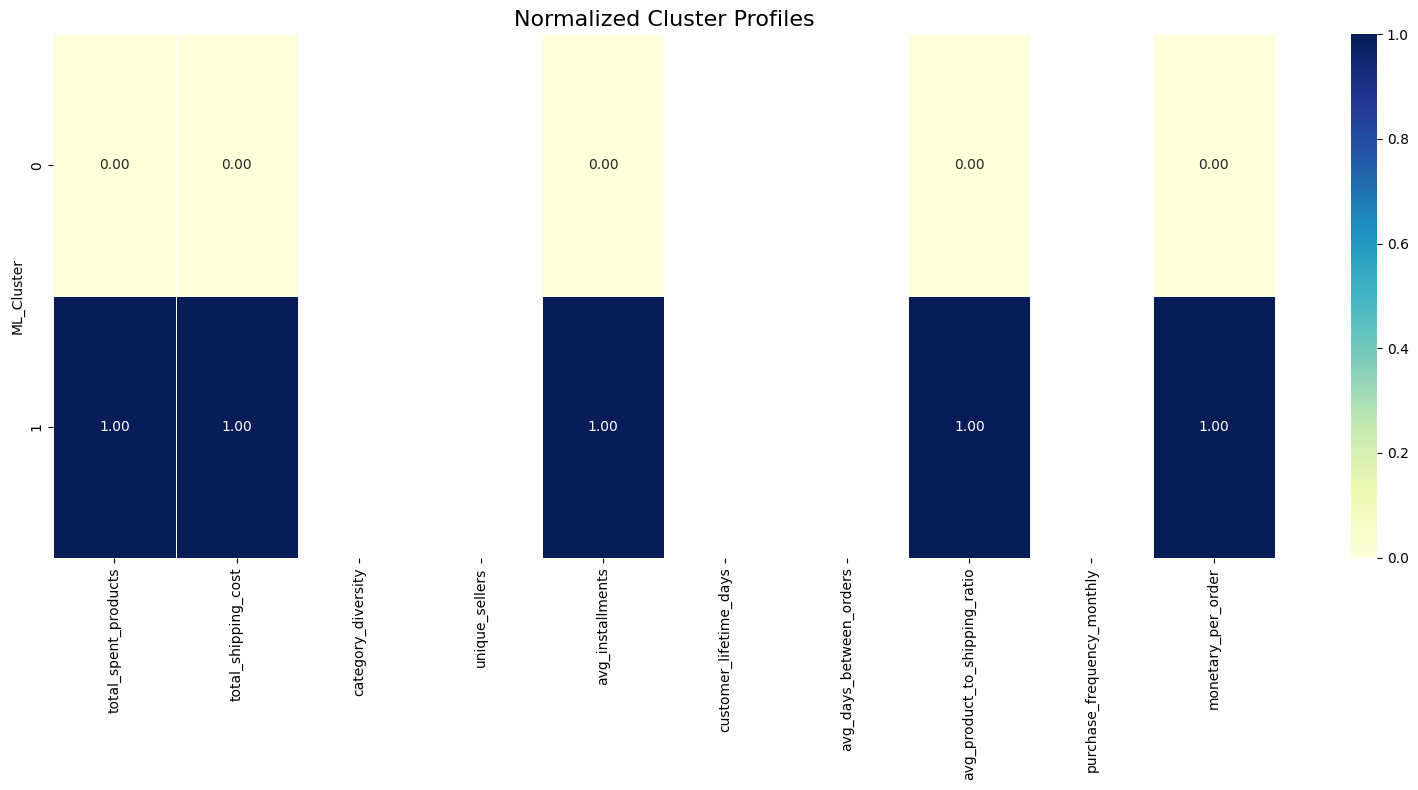

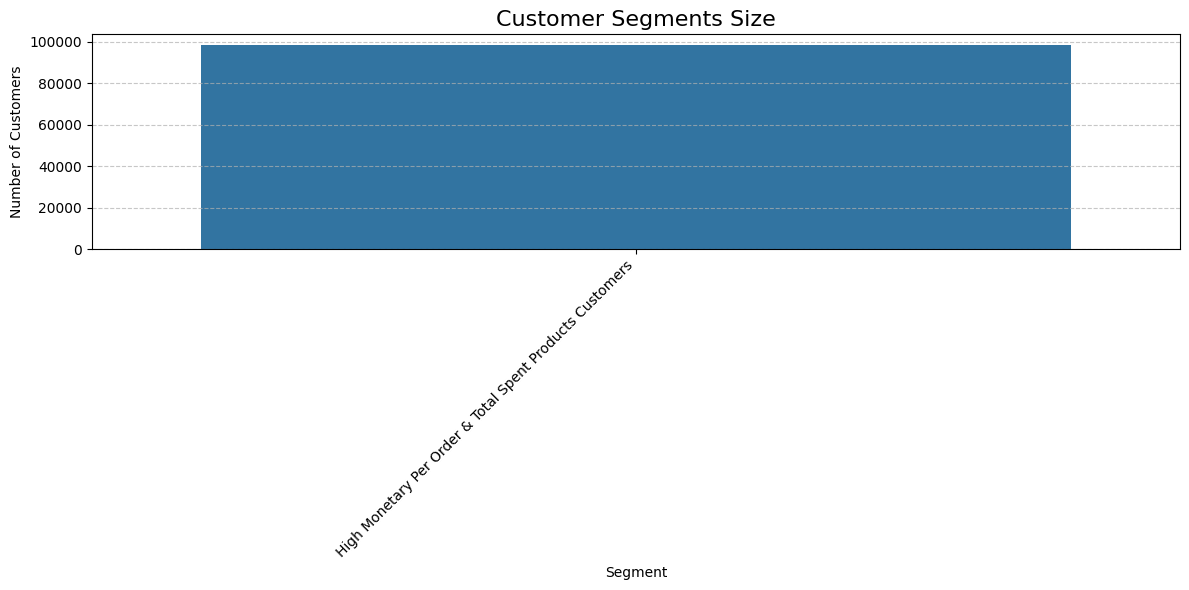

In [78]:
# Prepare data for final customer segmentation
def prepare_segmentation_data(customer_df, recommended_features):
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    from sklearn.decomposition import PCA
    
    # Select recommended features for segmentation
    X = customer_df[recommended_features].copy()
    
    # Handle missing values
    X = X.fillna(X.median())
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA for dimensionality reduction and visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Create a DataFrame for visualization
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['customer_id'] = customer_df['customer_id'].values
    
    # Determine optimal number of clusters
    silhouette_scores = []
    inertia = []
    
    K_range = range(2, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
        inertia.append(kmeans.inertia_)
    
    # Plot silhouette scores and elbow method
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Silhouette score (higher is better)
    axes[0].plot(K_range, silhouette_scores, 'bo-')
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title('Silhouette Score by Number of Clusters')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    
    # Elbow method (looking for the "elbow" point)
    axes[1].plot(K_range, inertia, 'ro-')
    axes[1].set_xlabel('Number of Clusters')
    axes[1].set_ylabel('Inertia (Sum of Squared Distances)')
    axes[1].set_title('Elbow Method for Optimal k')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Get the optimal k based on silhouette score
    optimal_k = K_range[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
    
    # Apply K-means with optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Add cluster labels to PCA and original data
    pca_df['Cluster'] = cluster_labels
    customer_df['ML_Cluster'] = cluster_labels
    
    # Visualize clusters in 2D PCA space
    plt.figure(figsize=(12, 8))
    
    # Plot each cluster with a different color
    for cluster in range(optimal_k):
        plt.scatter(
            pca_df[pca_df['Cluster'] == cluster]['PC1'],
            pca_df[pca_df['Cluster'] == cluster]['PC2'],
            label=f'Cluster {cluster}',
            alpha=0.7,
            s=80
        )
    
    # Add cluster centers
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(
        centers_pca[:, 0], centers_pca[:, 1],
        s=250, marker='X', c='black',
        label='Cluster Centers'
    )
    
    plt.title('Customer Segments in 2D PCA Space', size=16)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Compare ML clusters with RFM segments
    if 'Customer_Segment' in customer_df.columns:
        cluster_segment_counts = pd.crosstab(
            customer_df['ML_Cluster'], 
            customer_df['Customer_Segment'],
            normalize='index'
        )
        
        # Visualize the comparison
        plt.figure(figsize=(14, 10))
        sns.heatmap(
            cluster_segment_counts, 
            annot=True, 
            cmap='YlGnBu', 
            fmt='.2f',
            linewidths=0.5
        )
        plt.title('ML Clusters vs. RFM Segments', size=16)
        plt.xlabel('RFM Segment')
        plt.ylabel('ML Cluster')
        plt.tight_layout()
        plt.show()
        
    # Analyze cluster characteristics
    cluster_profiles = customer_df.groupby('ML_Cluster')[recommended_features].mean()
    
    # Normalize the profiles for comparison
    cluster_profiles_norm = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())
    
    # Display cluster profiles
    print("\nCluster Profiles (normalized):")
    print(cluster_profiles_norm)
    
    # Visualize cluster profiles
    plt.figure(figsize=(16, 8))
    sns.heatmap(
        cluster_profiles_norm, 
        annot=True, 
        cmap='YlGnBu', 
        fmt='.2f',
        linewidths=0.5
    )
    plt.title('Normalized Cluster Profiles', size=16)
    plt.tight_layout()
    plt.show()
    
    # Create descriptive names for each cluster based on their characteristics
    cluster_names = {}
    
    for cluster in range(optimal_k):
        profile = cluster_profiles.loc[cluster]
        
        # Find the top 3 features for this cluster
        top_features = profile.nlargest(3).index.tolist()
        
        # Check if recency is high (meaning less recent purchases)
        high_recency = 'recency_days' in profile.nlargest(3).index
        
        # Check if monetary and frequency metrics are high
        high_monetary = 'monetary_total' in profile.nlargest(3).index
        high_frequency = 'frequency' in profile.nlargest(3).index
        
        # Create descriptive names based on characteristics
        if high_monetary and high_frequency and not high_recency:
            cluster_names[cluster] = "High Value Active Customers"
        elif high_monetary and not high_frequency:
            cluster_names[cluster] = "Big Spenders (Infrequent)"
        elif high_frequency and not high_monetary:
            cluster_names[cluster] = "Frequent Small Purchasers"
        elif high_recency:
            cluster_names[cluster] = "Inactive Customers"
        else:
            # Custom name based on top features
            feature_names = [f.replace('_', ' ').title() for f in top_features]
            cluster_names[cluster] = f"High {' & '.join(feature_names[:2])} Customers"
    
    # Add descriptive names to the dataframe
    customer_df['Cluster_Name'] = customer_df['ML_Cluster'].map(cluster_names)
    
    # Display cluster names and sizes
    cluster_sizes = customer_df['Cluster_Name'].value_counts()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values)
    plt.title('Customer Segments Size', size=16)
    plt.xlabel('Segment')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    return customer_df, kmeans, scaler, cluster_names

# Apply segmentation preparation
customer_segmented, kmeans_model, scaler_model, cluster_names = prepare_segmentation_data(customer_rfm, recommended_features)

### Geographic Analysis for Customer Segmentation

In [79]:
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'customer_city_std',
       'customer_state_std', 'match_score', 'match_method'],
      dtype='object')

In [80]:
# Geographic analysis for customer segmentation
def perform_geographic_analysis(df, customer_df, geolocation):
    # Ensure we have geolocation data for both customers and sellers
    if 'customer_zip_code_prefix' in customer_df.columns and 'geolocation_zip_code_prefix' in geolocation.columns:
        # Get customer state distribution by segment
        if 'Cluster_Name' in customer_df.columns:
            # Join customer data with geolocation
            customer_geo = customer_df.merge(
                geolocation[['geolocation_zip_code_prefix', 'geolocation_state']].drop_duplicates(),
                left_on='customer_zip_code_prefix',
                right_on='geolocation_zip_code_prefix',
                how='left'
            )
            
            # State distribution by segment
            state_segment = pd.crosstab(
                customer_geo['geolocation_state'], 
                customer_geo['Cluster_Name'],
                normalize='columns'
            )
            
            # Plot state distribution by segment
            plt.figure(figsize=(16, 10))
            sns.heatmap(
                state_segment, 
                annot=True, 
                cmap='YlGnBu', 
                fmt='.2f',
                linewidths=0.5
            )
            plt.title('State Distribution by Customer Segment', size=16)
            plt.xlabel('Customer Segment')
            plt.ylabel('State')
            plt.tight_layout()
            plt.show()
            
            # Calculate geographic concentration for each segment
            # High concentration means customers are concentrated in fewer states
            segment_geo_concentration = {}
            
            for segment in customer_geo['Cluster_Name'].unique():
                segment_states = customer_geo[customer_geo['Cluster_Name'] == segment]['geolocation_state'].value_counts(normalize=True)
                # Calculate Herfindahl-Hirschman Index (HHI) for concentration
                hhi = np.sum(segment_states**2)
                segment_geo_concentration[segment] = hhi
            
            # Plot geographic concentration
            plt.figure(figsize=(12, 6))
            segments = list(segment_geo_concentration.keys())
            hhi_values = list(segment_geo_concentration.values())
            
            bars = plt.bar(segments, hhi_values)
            
            # Color bars by concentration level
            for i, bar in enumerate(bars):
                if hhi_values[i] > 0.5:
                    bar.set_color('darkred')  # High concentration
                elif hhi_values[i] > 0.3:
                    bar.set_color('orange')   # Medium concentration
                else:
                    bar.set_color('green')    # Low concentration (more distributed)
            
            plt.title('Geographic Concentration by Customer Segment', size=16)
            plt.xlabel('Segment')
            plt.ylabel('Concentration Index (HHI)')
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            # Add concentration information to segment profiles
            print("\nGeographic Concentration by Segment:")
            for segment, hhi in segment_geo_concentration.items():
                concentration_level = "High" if hhi > 0.5 else "Medium" if hhi > 0.3 else "Low"
                print(f"{segment}: {concentration_level} concentration (HHI = {hhi:.2f})")
                
                # Top 3 states for this segment
                top_states = customer_geo[customer_geo['Cluster_Name'] == segment]['geolocation_state'].value_counts(normalize=True).head(3)
                print(f"  Top states: {', '.join([f'{state} ({pct:.1%})' for state, pct in top_states.items()])}")
            
            # Create a more detailed geographic analysis for urban vs. rural 
            # by looking at city population (approximated by customer count in each city)
            city_size = customer_geo['customer_city'].value_counts()
            
            # Classify cities by size
            large_cities = city_size[city_size >= np.percentile(city_size, 75)].index
            medium_cities = city_size[(city_size >= np.percentile(city_size, 25)) & 
                                     (city_size < np.percentile(city_size, 75))].index
            small_cities = city_size[city_size < np.percentile(city_size, 25)].index
            
            # Add city size classification to customer data
            customer_geo['city_size'] = 'Medium'
            customer_geo.loc[customer_geo['customer_city'].isin(large_cities), 'city_size'] = 'Large'
            customer_geo.loc[customer_geo['customer_city'].isin(small_cities), 'city_size'] = 'Small'
            
            # City size distribution by segment
            city_size_segment = pd.crosstab(
                customer_geo['city_size'], 
                customer_geo['Cluster_Name'],
                normalize='columns'
            )
            
            # Plot city size distribution by segment
            plt.figure(figsize=(14, 8))
            sns.heatmap(
                city_size_segment, 
                annot=True, 
                cmap='YlGnBu', 
                fmt='.2f',
                linewidths=0.5
            )
            plt.title('City Size Distribution by Customer Segment', size=16)
            plt.xlabel('Customer Segment')
            plt.ylabel('City Size')
            plt.tight_layout()
            plt.show()
            
            # Return the enhanced customer dataframe with geographic information
            return customer_geo
        else:
            print("Warning: No 'Cluster_Name' column found in customer data. Run segmentation first.")
            return customer_df
    else:
        print("Warning: Required geographic columns not found in the data.")
        return customer_df

# Perform geographic analysis
customer_geo_segmented = perform_geographic_analysis(df, customer_segmented, geolocation)

In [81]:
# Store new dataset in csv file
df.to_csv('olist_dataset/olist_orders_dataset_cleaned.csv', index=False)